# Нахождение размерностей выборок нелинейными методами 2

## Описание данных

In [1]:
%matplotlib inline
# %matplotlib notebook 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as rand 

Data sets:
* Swiss roll 
* moons
* s_curve
* Airfoils 
* MNIST
* iris dataset 
* diabetes dataset
* boston house-prices dataset 
* Olivetti faces data-set from AT&T
* California housing dataset 
* Labeled Faces in the Wild (LFW) people dataset

Methods: 
* Local methods
* Isomap

### 2-30D spheres 

In [2]:
from mpl_toolkits.mplot3d import Axes3D

# generate shperes of different dimensions (from 2 to 30)
n, d_max = 1000, 30
d_sphere_data = []
for d in range(2,d_max+1):
    norm_x = rand.randn(n,d)
    sphere_data = pd.DataFrame(norm_x/np.sqrt(np.sum(norm_x**2, axis=1))[:,None])
    d_sphere_data.append(sphere_data)
print('Number of objects = ', n)
print('Number of features = 2-30')

# plot 3d sphere
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter3D(norm_x[:,0],norm_x[:,1],norm_x[:,2])

Number of objects =  1000
Number of features = 2-30


### Swiss roll

In [3]:
from sklearn.datasets import make_swiss_roll

# generate swiss roll and swiss roll with noise
n,noise = 200,1
swiss_roll_data = make_swiss_roll(n)[0]
swiss_roll_with_noise_data = make_swiss_roll(n, noise)[0]

print('Number of objects = ', n)
print('Number of features = ',swiss_roll_data.shape[1])

Number of objects =  200
Number of features =  3


### Moons

In [4]:
from sklearn.datasets import make_moons

# generate moons and moons with noise
n,noise = 200,0.1
moons_data = np.zeros((n,3))
moons_data[:,0:2] = make_moons(n)[0]
moons_data[:,2] = rand.uniform(0,1,200)

moons_with_noise_data = np.zeros((n,3))
moons_with_noise_data[:,0:2] = make_moons(n,noise=noise)[0]
moons_with_noise_data[:,2] = rand.uniform(0,1,200)

print('Number of objects = ', n)
print('Number of features = ',moons_data.shape[1])

Number of objects =  200
Number of features =  3


### S Curve

In [5]:
from sklearn.datasets import make_s_curve

# generate s curve and s curve with noise
n,noise = 200,0.2
s_curve_data = make_s_curve(n)[0]
s_curve_with_noise_data = make_s_curve(n,noise=noise)[0]

### Airfoils

In [6]:
airfoils_data = pd.read_csv('airfoils.csv')
print('Number of objects = ', airfoils_data.shape[0])
print('Number of features = ',airfoils_data.shape[1])

Number of objects =  198
Number of features =  59


### MNIST

In [7]:
mnist_data = pd.read_csv('train.csv')
small_mnist_data = mnist_data.groupby('label').head(100).reset_index(drop=True)
mnist_data = mnist_data.drop('label',axis = 1)
small_mnist_data
small_mnist_data = small_mnist_data.drop('label',axis = 1)
print('Number of objects = ', small_mnist_data.shape[0])
print('Number of features = ',small_mnist_data.shape[1])
print('\nFor full mnist:')
print('Number of objects = ', mnist_data.shape[0])
print('Number of features = ',mnist_data.shape[1])

Number of objects =  1000
Number of features =  784

For full mnist:
Number of objects =  42000
Number of features =  784


### Iris dataset 

In [8]:
from sklearn.datasets import load_iris

iris_data = pd.DataFrame(load_iris().data)
print('Number of objects = ', iris_data.shape[0])
print('Number of features = ',iris_data.shape[1])

Number of objects =  150
Number of features =  4


### Diabetes dataset 

In [9]:
from sklearn.datasets import load_diabetes

diabetes_data = pd.DataFrame(load_diabetes().data)
print('Number of objects = ', diabetes_data.shape[0])
print('Number of features = ',diabetes_data.shape[1])

Number of objects =  442
Number of features =  10


### Boston house-prices dataset

In [10]:
from sklearn.datasets import load_boston

boston_data = pd.DataFrame(load_boston().data)
print('Number of objects = ', boston_data.shape[0])
print('Number of features = ',boston_data.shape[1])

Number of objects =  506
Number of features =  13


### Olivetti faces dataset

In [11]:
from sklearn.datasets import fetch_olivetti_faces

olivetti_data = pd.DataFrame(fetch_olivetti_faces().data)
print('Number of objects = ', olivetti_data.shape[0])
print('Number of features = ',olivetti_data.shape[1])

Number of objects =  400
Number of features =  4096


### California housing dataset 

In [12]:
from sklearn.datasets import fetch_california_housing

california_data = pd.DataFrame(fetch_california_housing().data)
print('Number of objects = ', california_data.shape[0])
print('Number of features = ',california_data.shape[1])

Number of objects =  20640
Number of features =  8


### Labeled Faces in the Wild (LFW) people dataset

In [13]:
from sklearn.datasets import fetch_lfw_people

lfw_data = pd.DataFrame(fetch_lfw_people(resize = 0.5).data)
print('Number of objects = ', lfw_data.shape[0])
print('Number of features = ',lfw_data.shape[1])

Number of objects =  13233
Number of features =  2914


# Methods and Dimensionality Estimation Results

### Levina-Bickel Method
Original paper: [Levina E., Bickel P.J.: Maximum Likelihood Estimation of Intrinsic Dimension](https://www.stat.berkeley.edu/~bickel/mldim.pdf) 

#### Algorithm
Based on implementation: https://codegists.com/snippet/python/intdim_mlepy_mehdidc_python

In [14]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

In [15]:
def intrinsic_dim_sample_wise(X, k=5, dist = None):
    """
    Returns Levina-Bickel dimensionality estimation
    
    Input parameters:
    X    - data
    k    - number of nearest neighbours (Default = 5)
    dist - matrix of distances to the k nearest neighbors of each point (Optional)
    
    Returns: 
    dimensionality estimation for the k 
    """
    if dist is None:
        neighb = NearestNeighbors(n_neighbors=k+1,algorithm='ball_tree').fit(X)
        dist, ind = neighb.kneighbors(X)
    dist = dist[:, 1:(k+1)]
    assert dist.shape == (X.shape[0], k)
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k - 1])
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample


def intrinsic_dim_scale_interval(X, k1=10, k2=20, dist = None):
    """
    Returns range of Levina-Bickel dimensionality estimation for k = k1..k2, k1 < k2
    
    Input parameters:
    X    - data
    k1   - minimal number of nearest neighbours (Default = 10)
    k2   - maximal number of nearest neighbours (Default = 20)
    dist - matrix of distances to the k nearest neighbors of each point (Optional)
    
    Returns: 
    list of Levina-Bickel dimensionality estimation for k = k1..k2
    """
    intdim_k = []
    if dist is None:
        neighb = NearestNeighbors(n_neighbors=k+1,algorithm='ball_tree').fit(X)
        dist, ind = neighb.kneighbors(X)
        
    for k in range(k1, k2 + 1):
        m = intrinsic_dim_sample_wise(X, k,dist).mean()
        intdim_k.append(m)
    return intdim_k


def bootstrap_intrinsic_dim_scale_interval(X, nb_iter=100, random_state=None, k1 = 10, k2 = 20, 
                                           average = True, plot_dependence = False, fig_name = "", title_add = ""):
    """
    Returns range of Levina-Bickel dimensionality estimation for k = k1..k2 (k1 < k2) averaged over bootstrap samples
    
    Input parameters:
    X            - data
    nb_iter      - number of bootstrap iterations (Default = 100)
    random_state - random state (Optional)
    k1           - minimal number of nearest neighbours (Default = 10)
    k2           - maximal number of nearest neighbours (Default = 20)
    average      - if False returns array of shape (nb_iter, k2-k1+1) of the estimations for each bootstrap samples (Default = True)
    
    Returns: 
    array of shape (k2-k1+1,) of Levina-Bickel dimensionality estimation for k = k1..k2 averaged over bootstrap samples
    """
    if random_state is None:
        rng = np.random
    else:
        rng = np.random.RandomState(random_state)
    X = pd.DataFrame(X.drop_duplicates().values)
    nb_examples = X.shape[0]
    results = []
    
    neighb = NearestNeighbors(n_neighbors=k2+1,algorithm='ball_tree').fit(X)
    dist, ind = neighb.kneighbors(X)    
    
    for i in range(nb_iter):
        idx = np.unique(rng.randint(0, nb_examples - 1, size=nb_examples))
        results.append(intrinsic_dim_scale_interval(X.iloc[idx], k1, k2, dist[idx,:]))
    results = np.array(results)
    if plot_dependence:
        dim_of_k = results.mean(axis = 0)
        levina_dimension = dim_of_k.mean()
        print('Dimension averanged over (k=',k1,'..',k2,') = ',levina_dimension)
        plt.plot(np.arange(k1,k2+1),dim_of_k)
        plt.xlabel('k - nearest neighbours')
        plt.ylabel('Dimension')
        if title_add == "":
            plt.title('Original dimension = '+str(X.shape[1])+', L-B dimension = '+str(levina_dimension))
        else:
            plt.title(title_add + ', original dimension = '+str(X.shape[1])+', L-B dimension = '+str(levina_dimension))
        if fig_name != "":
            plt.savefig(fig_name)
    if average:
        return results.mean(axis = 0)
    else:
        return results

#### Applying to spheres

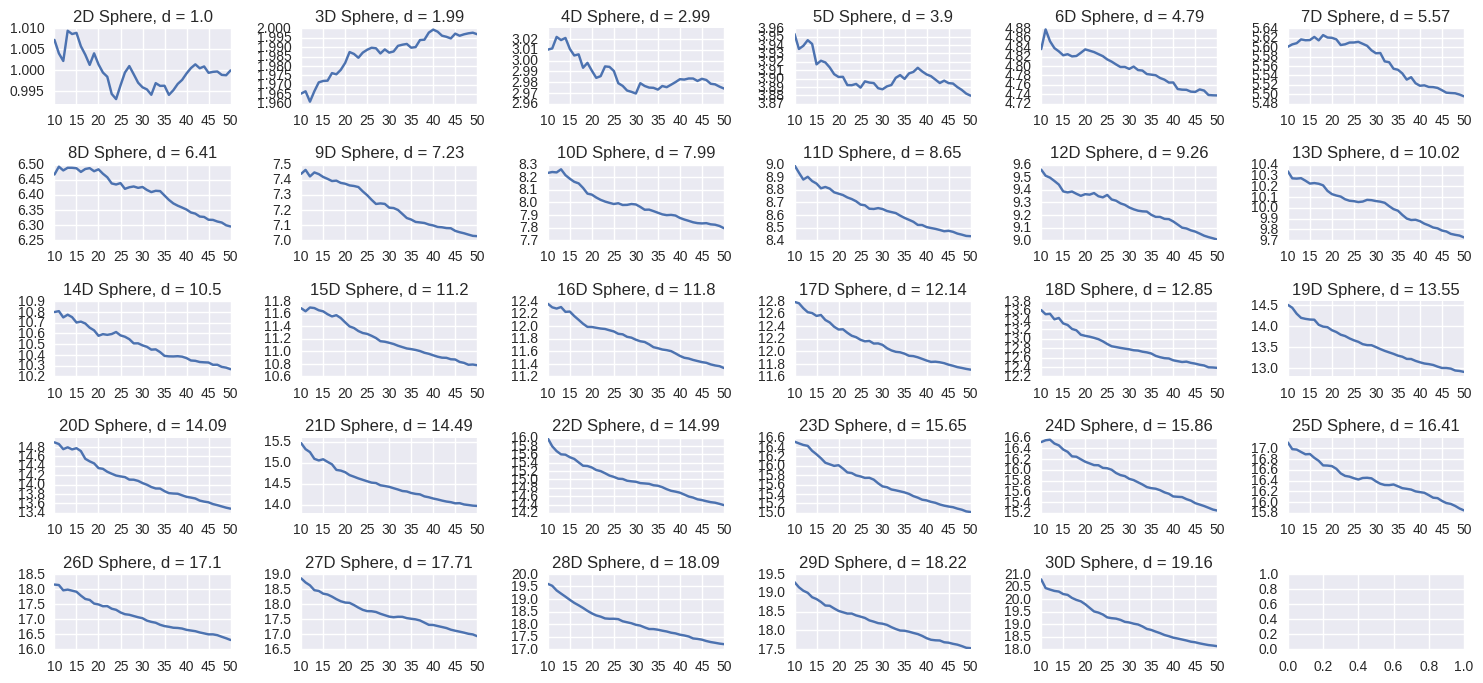

In [122]:
lev_bick_sphere_results = []
k1 = 10 # start of interval(included)
k2 = 50 # end of interval(included)
f, axarr = plt.subplots(5, 6,figsize=(15,7))
for i in range(len(d_sphere_data)):
    # dimensionality estimation
    dim_of_k = bootstrap_intrinsic_dim_scale_interval(d_sphere_data[i], nb_iter=50, k1=k1, k2=k2)
    levina_dimension = round(dim_of_k.mean(),2)
    lev_bick_sphere_results.append(levina_dimension)
    
    # plot dependence of dimension estimation from k
    axarr[i//6,i%6].plot(np.arange(k1,k2+1),dim_of_k)
    axarr[i//6,i%6].set_title(str(i+2)+'D Sphere, d = '+str(levina_dimension))
f.tight_layout()
plt.savefig("pic1_1.pdf")

Понятно, что теоретическая размерность данных равна (размерности пространства - 1). Можно сказать, что с шарами в пространствах до размерности 7 метод Левиной-Бикеля справился отлично(с гиперапараметром k от 10 до 50).
На последующих размерностях результат алгоритма все более не дотягивает до настоящего значения.

Также можно отметить особенность, что чем больше гиперпраметр k, тем более низкое значение размерности в качестве ответа дает алгоритм, что видно на графиках. Это при том, что алгоритм и так теоретическую размерность недооценивает.

#### Applying to Swiss roll 

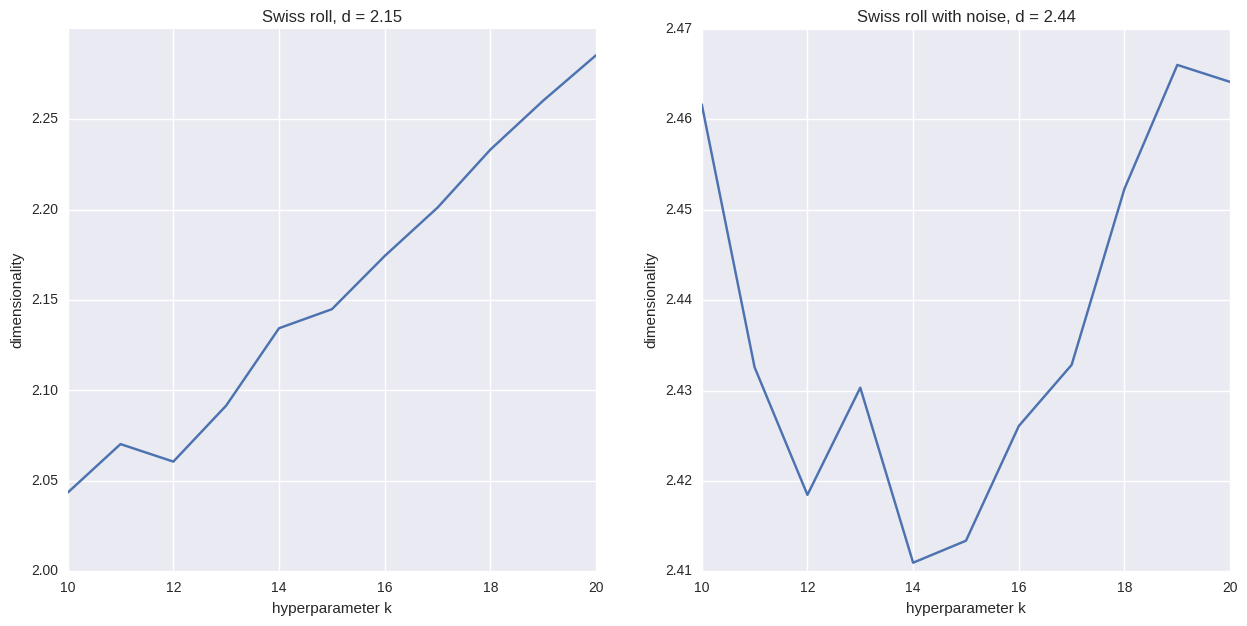

In [17]:
# dimensionality estimation and ploting dependence of dimension estimation from k
k1 = 10 # start of interval(included)
k2 = 20 # end of interval(included)
fig, axarr = plt.subplots(1, 2,figsize=(15,7))

# dimensionality estimation
dim_of_k = bootstrap_intrinsic_dim_scale_interval(swiss_roll_data, nb_iter=50, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(),2)
# plot dependence of dimension estimation from k
axarr[0].plot(np.arange(k1,k2+1),dim_of_k)
axarr[0].set_title("Swiss roll, d = " + str(levina_dimension))

# dimensionality estimation
dim_of_k = bootstrap_intrinsic_dim_scale_interval(swiss_roll_with_noise_data, nb_iter=50, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(),2)
# plot dependence of dimension estimation from k
axarr[1].plot(np.arange(k1,k2+1),dim_of_k)
axarr[1].set_title("Swiss roll with noise, d = " + str(levina_dimension))

for index in range(2):
    axarr[index].set_xlabel("hyperparameter k")
    axarr[index].set_ylabel("dimensionality")

#fig.tight_layout()
plt.savefig("pic1_2.pdf")

На чистых данных Swiss roll метод Левиной-Бикеля правильно оценил размерность. Но ответ 2.5 на данных с шумом указывает на подверженность шуму.

#### Applying to moons

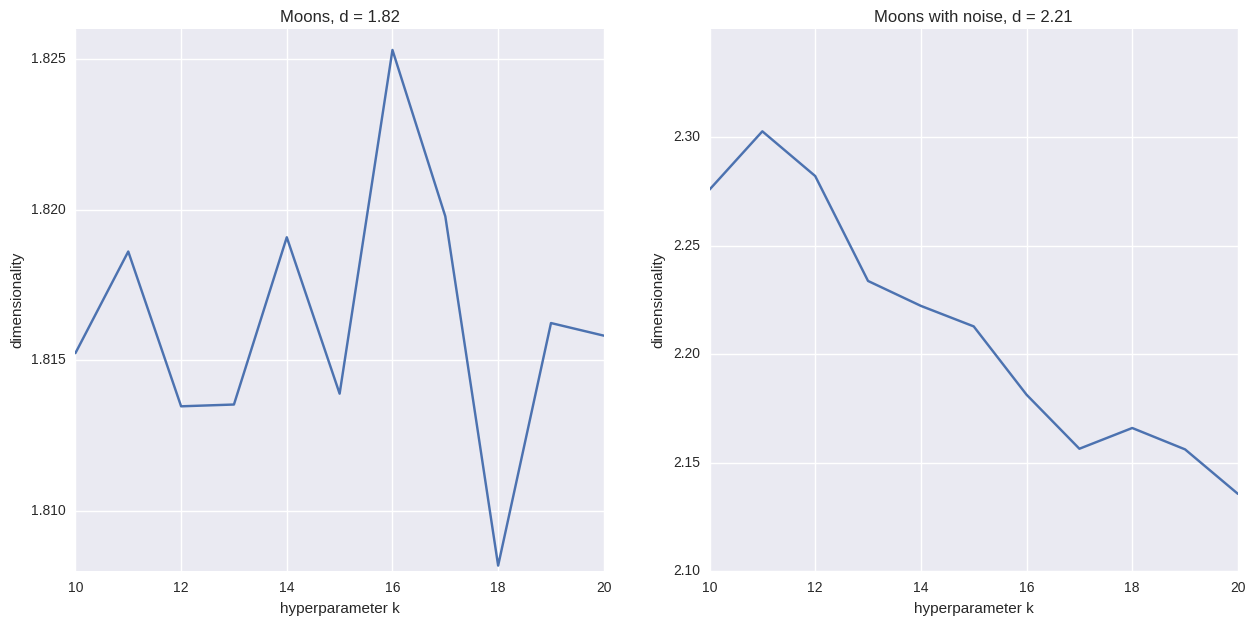

In [18]:
# dimensionality estimation and ploting dependence of dimension estimation from k
k1 = 10 # start of interval(included)
k2 = 20 # end of interval(included)
fig, axarr = plt.subplots(1, 2,figsize=(15,7))

# dimensionality estimation
dim_of_k = bootstrap_intrinsic_dim_scale_interval(moons_data, nb_iter=50, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(),2)
# plot dependence of dimension estimation from k
axarr[0].plot(np.arange(k1,k2+1),dim_of_k)
axarr[0].set_title("Moons, d = " + str(levina_dimension))

# dimensionality estimation
dim_of_k = bootstrap_intrinsic_dim_scale_interval(moons_with_noise_data, nb_iter=50, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(),2)
# plot dependence of dimension estimation from k
axarr[1].plot(np.arange(k1,k2+1),dim_of_k)
axarr[1].set_title("Moons with noise, d = " + str(levina_dimension))

for index in range(2):
    axarr[index].set_xlabel("hyperparameter k")
    axarr[index].set_ylabel("dimensionality")

#fig.tight_layout()
plt.savefig("pic1_3.pdf")

#### Applying to s curve

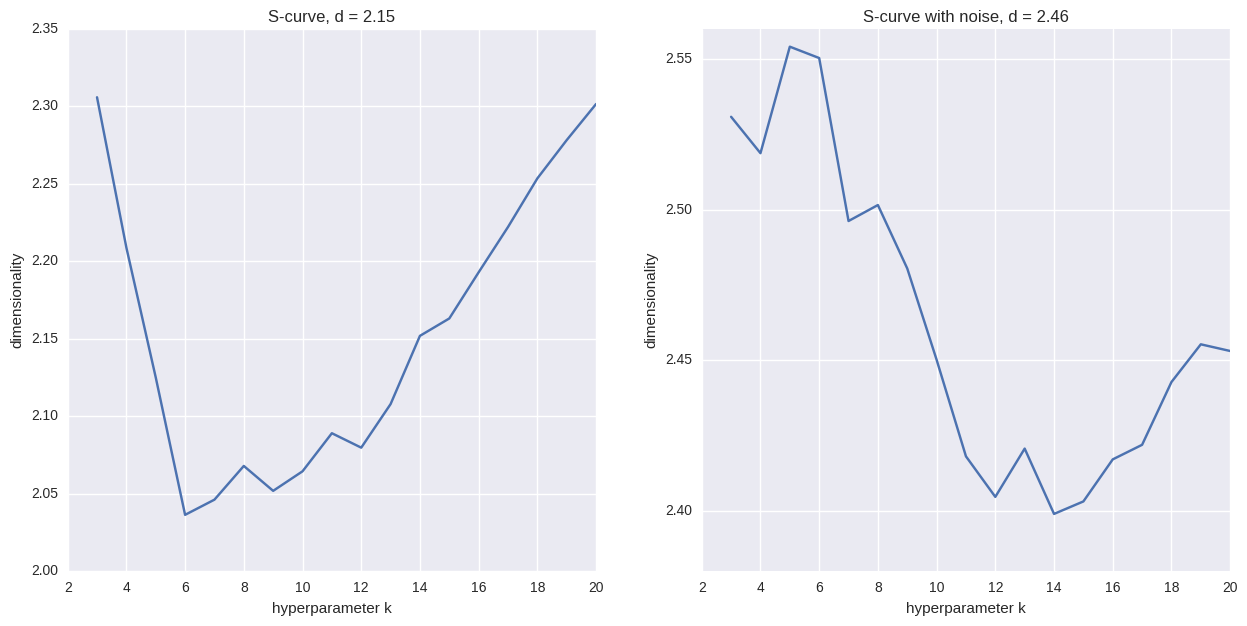

In [19]:
# dimensionality estimation and ploting dependence of dimension estimation from k
k1 = 3 # start of interval(included)
k2 = 20 # end of interval(included)
fig, axarr = plt.subplots(1, 2,figsize=(15,7))

# dimensionality estimation
dim_of_k = bootstrap_intrinsic_dim_scale_interval(swiss_roll_data, nb_iter=50, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(),2)
# plot dependence of dimension estimation from k
axarr[0].plot(np.arange(k1,k2+1),dim_of_k)
axarr[0].set_title("S-curve, d = " + str(levina_dimension))

# dimensionality estimation
dim_of_k = bootstrap_intrinsic_dim_scale_interval(swiss_roll_with_noise_data, nb_iter=50, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(),2)
# plot dependence of dimension estimation from k
axarr[1].plot(np.arange(k1,k2+1),dim_of_k)
axarr[1].set_title("S-curve with noise, d = " + str(levina_dimension))

for index in range(2):
    axarr[index].set_xlabel("hyperparameter k")
    axarr[index].set_ylabel("dimensionality")

#fig.tight_layout()
plt.savefig("pic1_4.pdf")

#### Applying to Airfoils

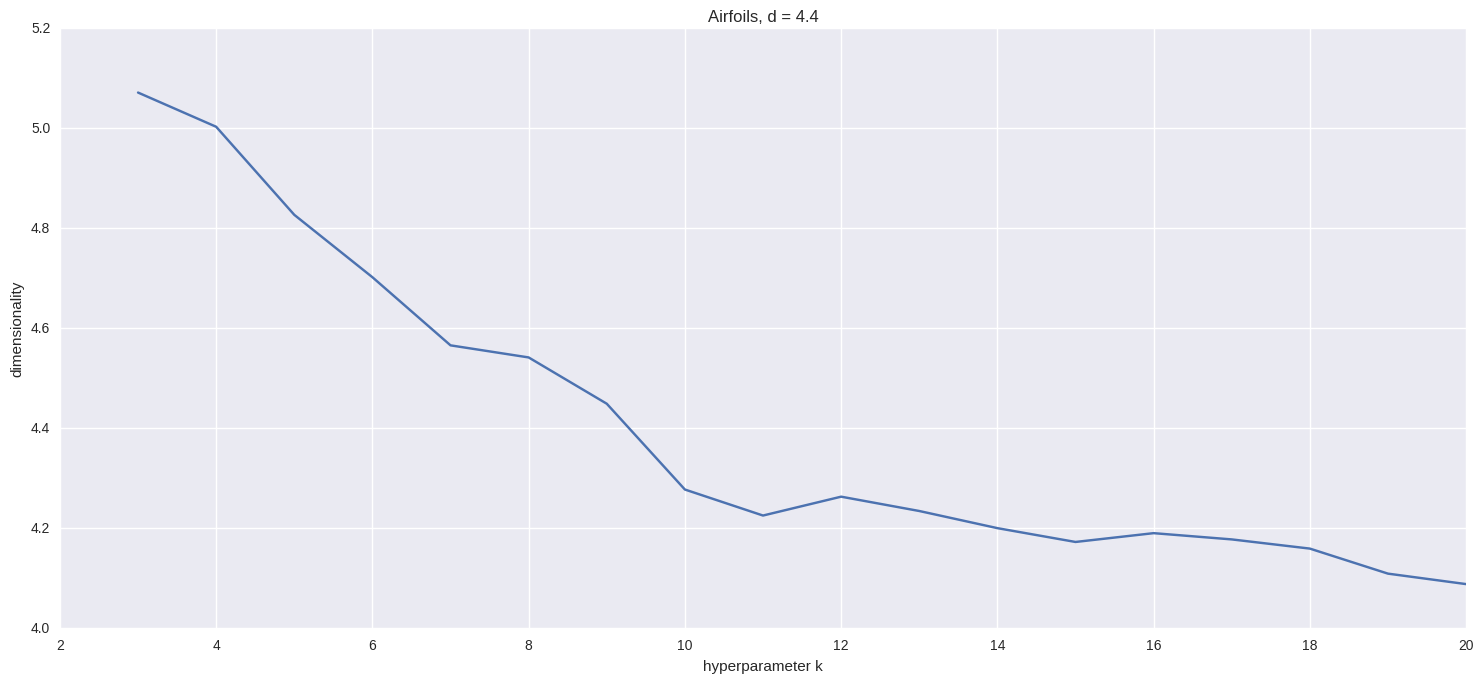

In [20]:
# dimensionality estimation and ploting dependence of k
k1,k2 = 3,20 # start,end of interval(included)
fig = plt.figure(figsize=(15,7))

# dimensionality estimation
dim_of_k = bootstrap_intrinsic_dim_scale_interval(airfoils_data, nb_iter=50, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(),2)
# plot dependence of dimension estimation from k
plt.plot(np.arange(k1,k2+1),dim_of_k)
plt.title("Airfoils, d = " + str(levina_dimension))

plt.xlabel("hyperparameter k")
plt.ylabel("dimensionality")

fig.tight_layout()
plt.savefig("pic1_5.pdf")

Согласно результату работы алгоритма Левиной-Бикеля размерность данных Airfoils = 4

#### Applying to MNIST

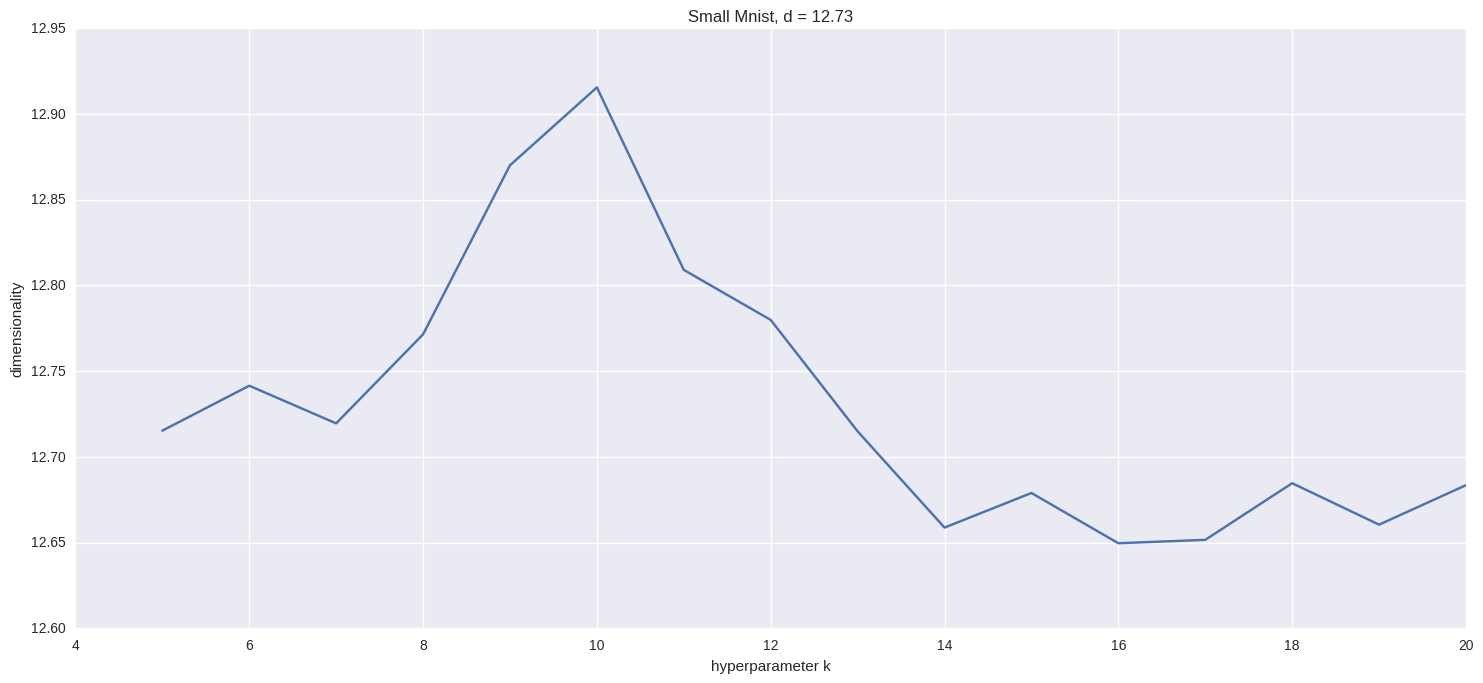

In [21]:
# dimensionality estimation and ploting dependence of k
k1,k2 = 5,20 # start,end of interval(included)
fig = plt.figure(figsize=(15,7))

# dimensionality estimation
dim_of_k = bootstrap_intrinsic_dim_scale_interval(small_mnist_data, nb_iter=50, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(),2)
# plot dependence of dimension estimation from k
plt.plot(np.arange(k1,k2+1),dim_of_k)
plt.title("Small Mnist, d = " + str(levina_dimension))

plt.xlabel("hyperparameter k")
plt.ylabel("dimensionality")

fig.tight_layout()
plt.savefig("pic1_6.pdf")

Результат - 12.

#### Applying to Iris

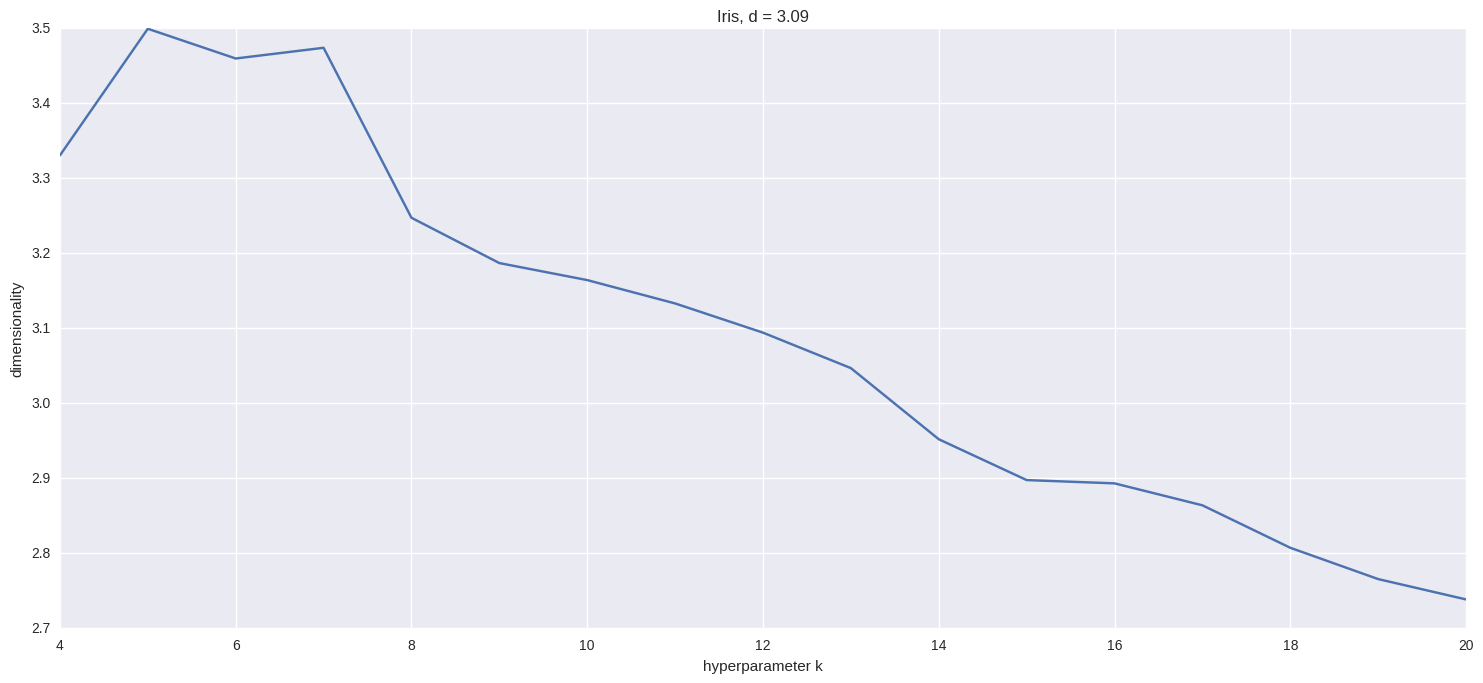

In [22]:
# dimensionality estimation and ploting dependence of k
k1,k2 = 4,20 # start of interval(included)
fig = plt.figure(figsize=(15,7))

# dimensionality estimation
dim_of_k = bootstrap_intrinsic_dim_scale_interval(iris_data, nb_iter=50, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(),2)
# plot dependence of dimension estimation from k
plt.plot(np.arange(k1,k2+1),dim_of_k)
plt.title("Iris, d = " + str(levina_dimension))

plt.xlabel("hyperparameter k")
plt.ylabel("dimensionality")

fig.tight_layout()
plt.savefig("pic1_7.pdf")

#### Applying to Diabetes

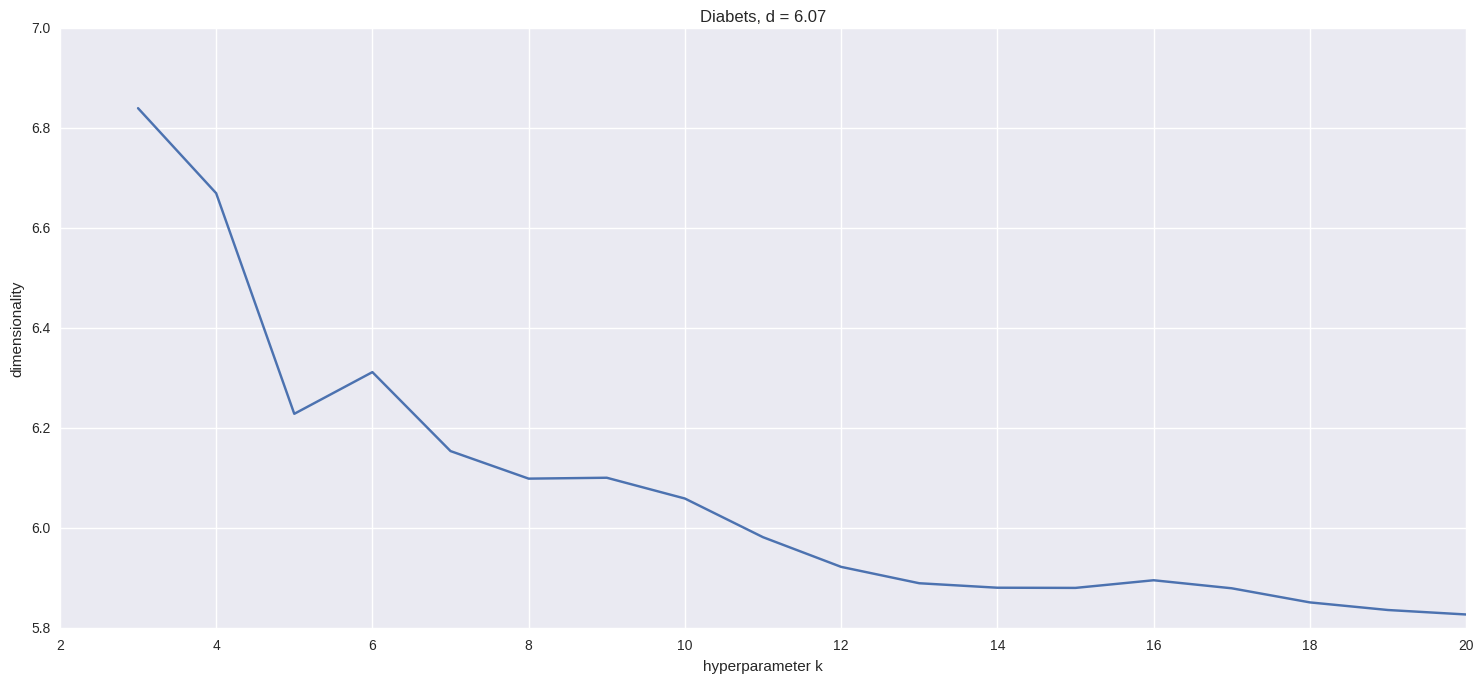

In [23]:
# dimensionality estimation and ploting dependence of k
k1,k2 = 3,20 # start,end of interval(included)
fig = plt.figure(figsize=(15,7))

# dimensionality estimation
dim_of_k = bootstrap_intrinsic_dim_scale_interval(diabetes_data, nb_iter=50, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(),2)
# plot dependence of dimension estimation from k
plt.plot(np.arange(k1,k2+1),dim_of_k)
plt.title("Diabets, d = " + str(levina_dimension))

plt.xlabel("hyperparameter k")
plt.ylabel("dimensionality")

fig.tight_layout()
plt.savefig("pic1_8.pdf")

#### Applying to Boston house-prices dataset 

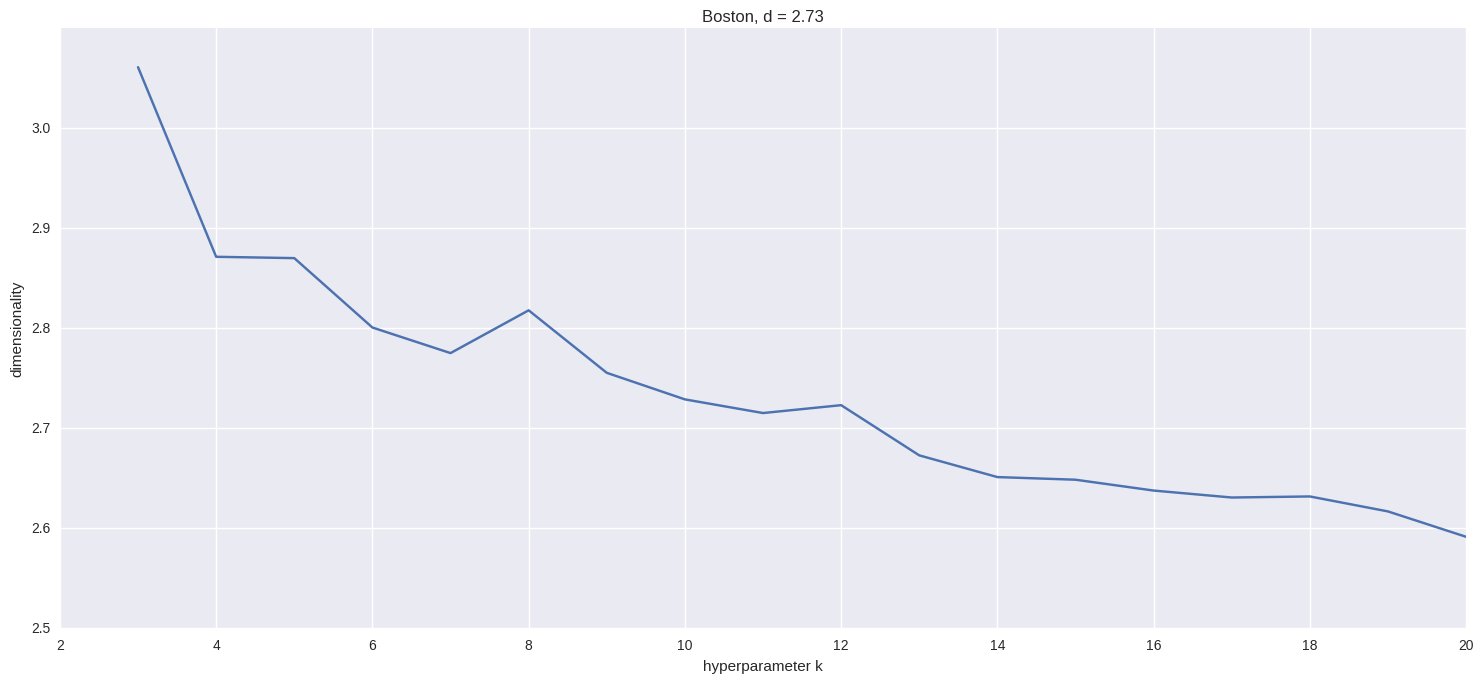

In [24]:
# dimensionality estimation and ploting dependence of k
k1,k2 = 3,20 # start,end of interval(included)
fig = plt.figure(figsize=(15,7))

# dimensionality estimation
dim_of_k = bootstrap_intrinsic_dim_scale_interval(boston_data, nb_iter=50, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(),2)
# plot dependence of dimension estimation from k
plt.plot(np.arange(k1,k2+1),dim_of_k)
plt.title("Boston, d = " + str(levina_dimension))

plt.xlabel("hyperparameter k")
plt.ylabel("dimensionality")

fig.tight_layout()
plt.savefig("pic1_9.pdf")

#### Applying to Olivetti faces data-set from AT&T

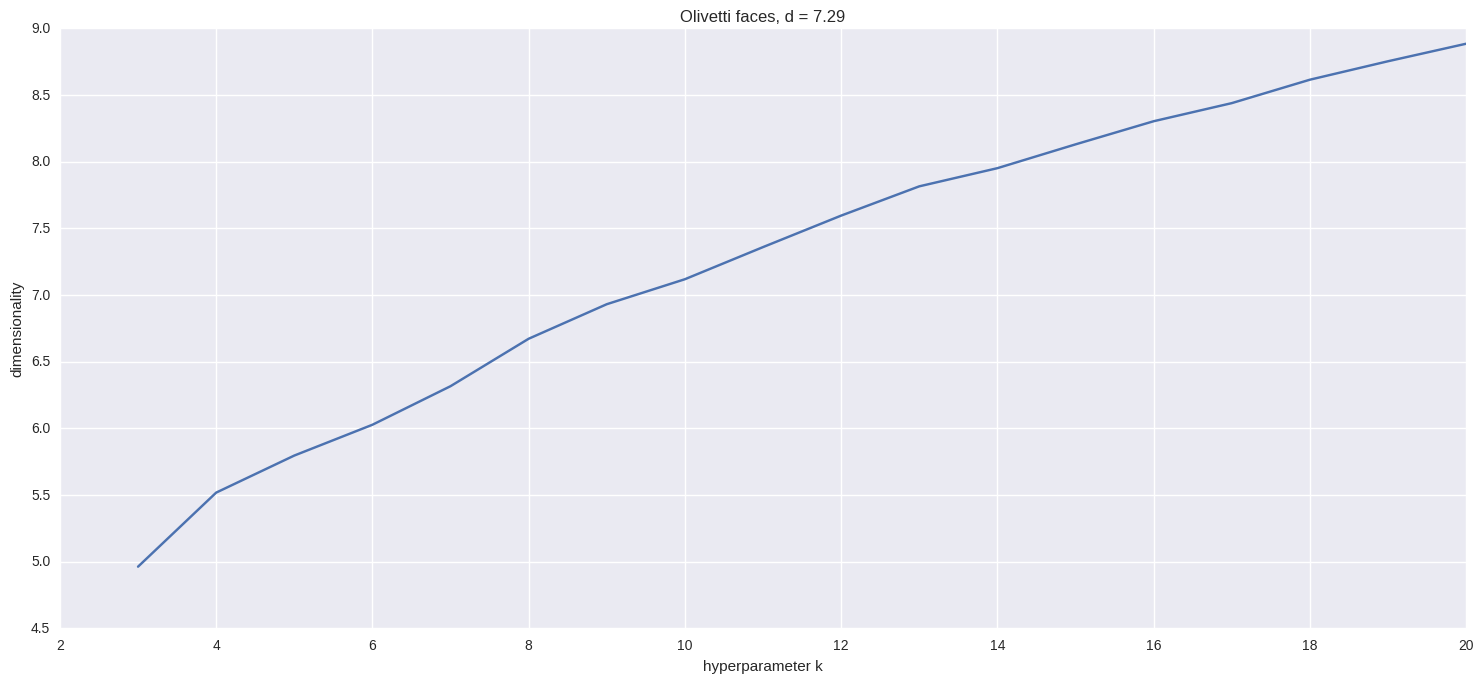

In [25]:
# dimensionality estimation and ploting dependence of k
k1,k2 = 3,20 # start,end of interval(included)
fig = plt.figure(figsize=(15,7))

# dimensionality estimation
dim_of_k = bootstrap_intrinsic_dim_scale_interval(olivetti_data, nb_iter=50, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(),2)
# plot dependence of dimension estimation from k
plt.plot(np.arange(k1,k2+1),dim_of_k)
plt.title("Olivetti faces, d = " + str(levina_dimension))

plt.xlabel("hyperparameter k")
plt.ylabel("dimensionality")

fig.tight_layout()
plt.savefig("pic1_10.pdf")

#### Applying to California housing dataset 

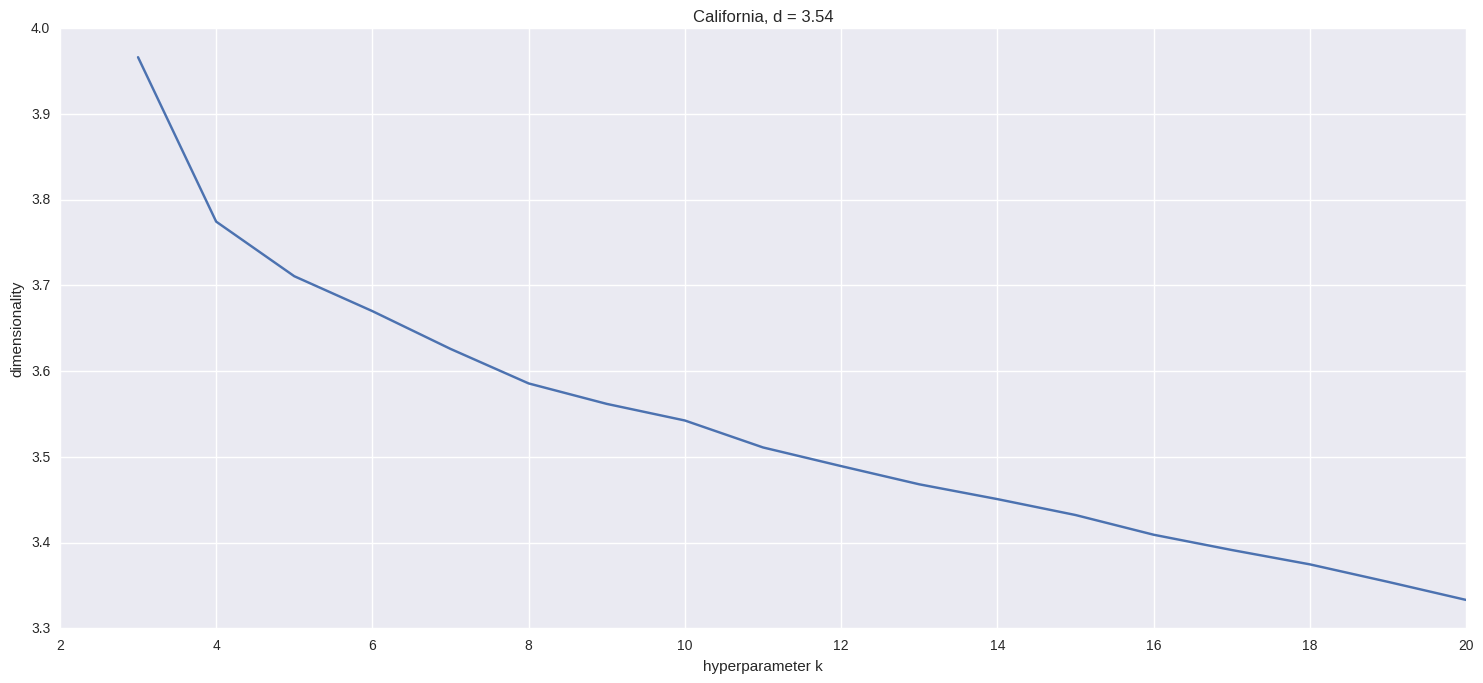

In [26]:
# dimensionality estimation and ploting dependence of k
k1,k2 = 3,20 # start, end of interval(included)
fig = plt.figure(figsize=(15,7))

# dimensionality estimation
dim_of_k = bootstrap_intrinsic_dim_scale_interval(california_data, nb_iter=50, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(),2)
# plot dependence of dimension estimation from k
plt.plot(np.arange(k1,k2+1),dim_of_k)
plt.title("California, d = " + str(levina_dimension))

plt.xlabel("hyperparameter k")
plt.ylabel("dimensionality")

fig.tight_layout()
plt.savefig("pic1_11.pdf")

#### Applying to LFW

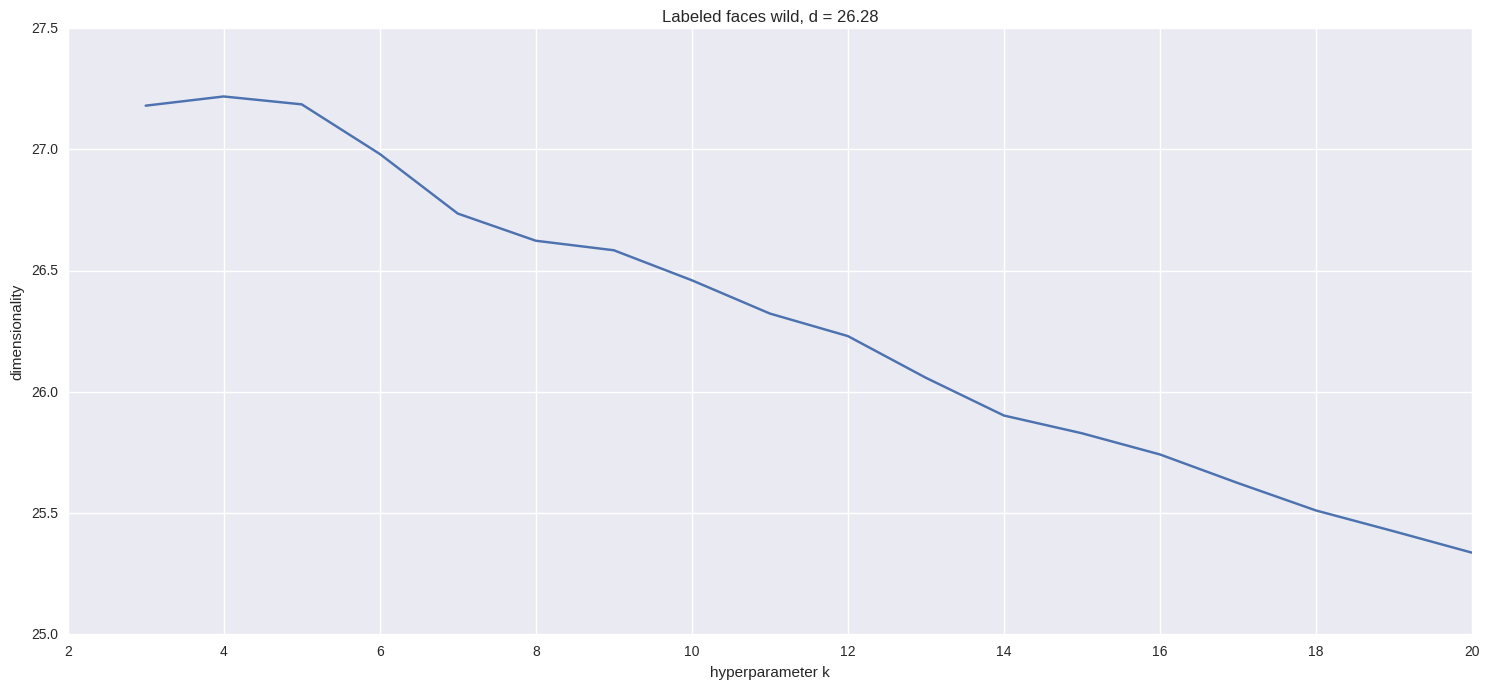

In [94]:
# dimensionality estimation and ploting dependence of k
k1,k2 = 3,20 # start,end of interval(included)
fig = plt.figure(figsize=(15,7))

# dimensionality estimation
dim_of_k = bootstrap_intrinsic_dim_scale_interval(lfw_data, nb_iter=50, k1=k1, k2=k2)
levina_dimension = round(dim_of_k.mean(),2)
# plot dependence of dimension estimation from k
plt.plot(np.arange(k1,k2+1),dim_of_k)
plt.title("Labeled faces wild, d = " + str(levina_dimension))

plt.xlabel("hyperparameter k")
plt.ylabel("dimensionality")

fig.tight_layout()
plt.savefig("pic1_12.pdf")

### Isomap
Original paper: [Joshua B. Tenenbaum,Vin de Silva, John C. Langford: A Global Geometric Framework for Nonlinear Dimensionality Reduction](http://wearables.cc.gatech.edu/paper_of_week/isomap.pdf)

#### Algorithm

In [14]:
from sklearn.manifold import Isomap
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

In [15]:
def compute_residual_variances_of_isomap(X,dims,n_neighbors = 5, plot_dependence = False, fig_name = "", title_add = ""):
    variances = []
    for m in dims:
        transformator = Isomap(n_components=m, n_neighbors=n_neighbors)
        transformator.fit(X)
        X_low = transformator.transform(X)
        D = squareform(pdist(X_low)).reshape(-1)
        D_fit = transformator.dist_matrix_.reshape(-1)
        variances.append(1 - np.corrcoef(D,D_fit)[0,1])
    if plot_dependence:
        plt.plot(dims, variances,'-^')
        plt.xlabel('dimensions')
        plt.ylabel('residual variance')
        if title_add != "":
            plt.title(title_add)
        if fig_name != "":
            plt.savefig(fig_name)
    return variances
        

#### Applying to Spheres

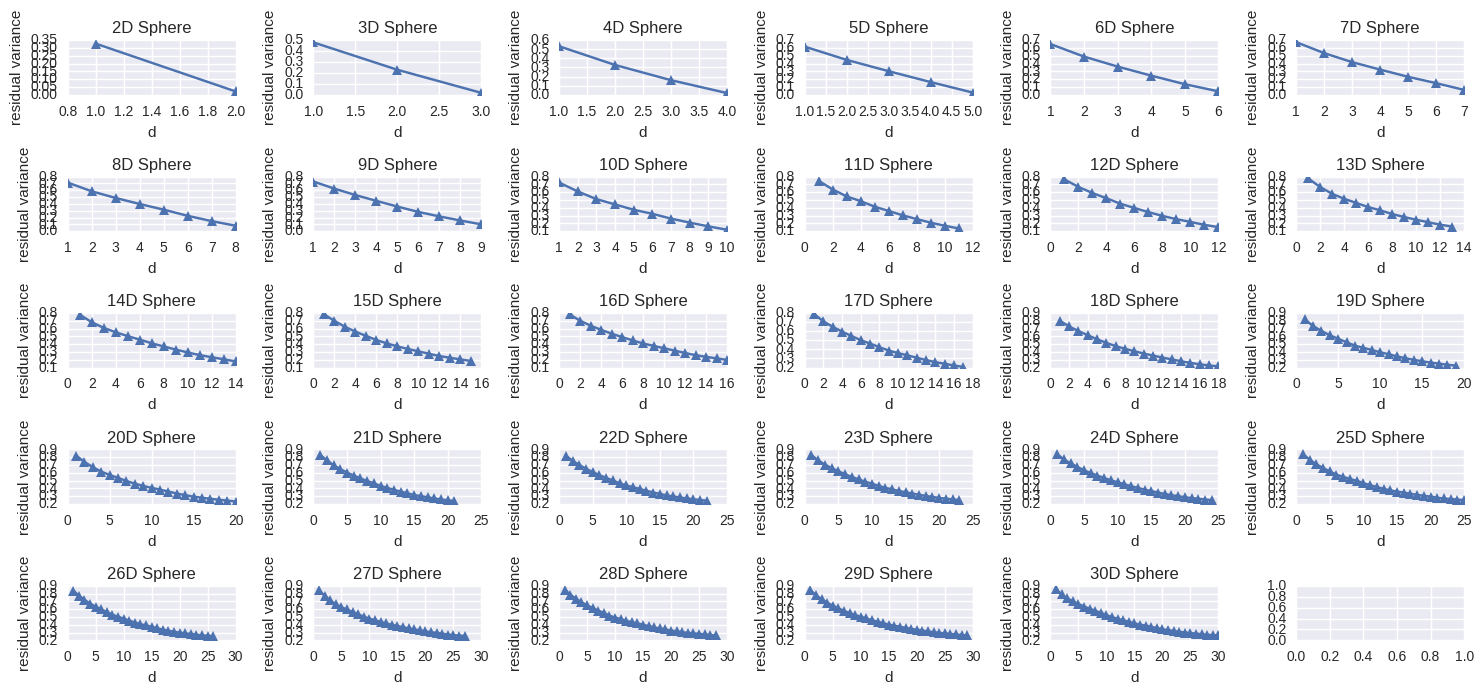

In [29]:
f, axarr = plt.subplots(5, 6,figsize=(15,7))
n_neighbors = 10
for i in range(len(d_sphere_data)):
    # dimensionality estimation
    dims = list(range(1,d_sphere_data[i].shape[1]+1))
    var_of_d = compute_residual_variances_of_isomap(d_sphere_data[i], dims, n_neighbors)
    
    # plot dependence of residual variance from dimension
    axarr[i//6,i%6].plot(dims,var_of_d,'-^')
    axarr[i//6,i%6].set_title(str(i+2)+'D Sphere')
    axarr[i//6,i%6].set_xlabel('d')
    axarr[i//6,i%6].set_ylabel('residual variance')
f.tight_layout()
plt.savefig("pic2_1.pdf")

Резких скачков сохраненной информации о данных не происходит при уменьшении размерности методом Isomap. Таким образом, заключаем, что алгоритм в качестве ответа выдвет размерность пространства.

#### Applying to Swiss roll

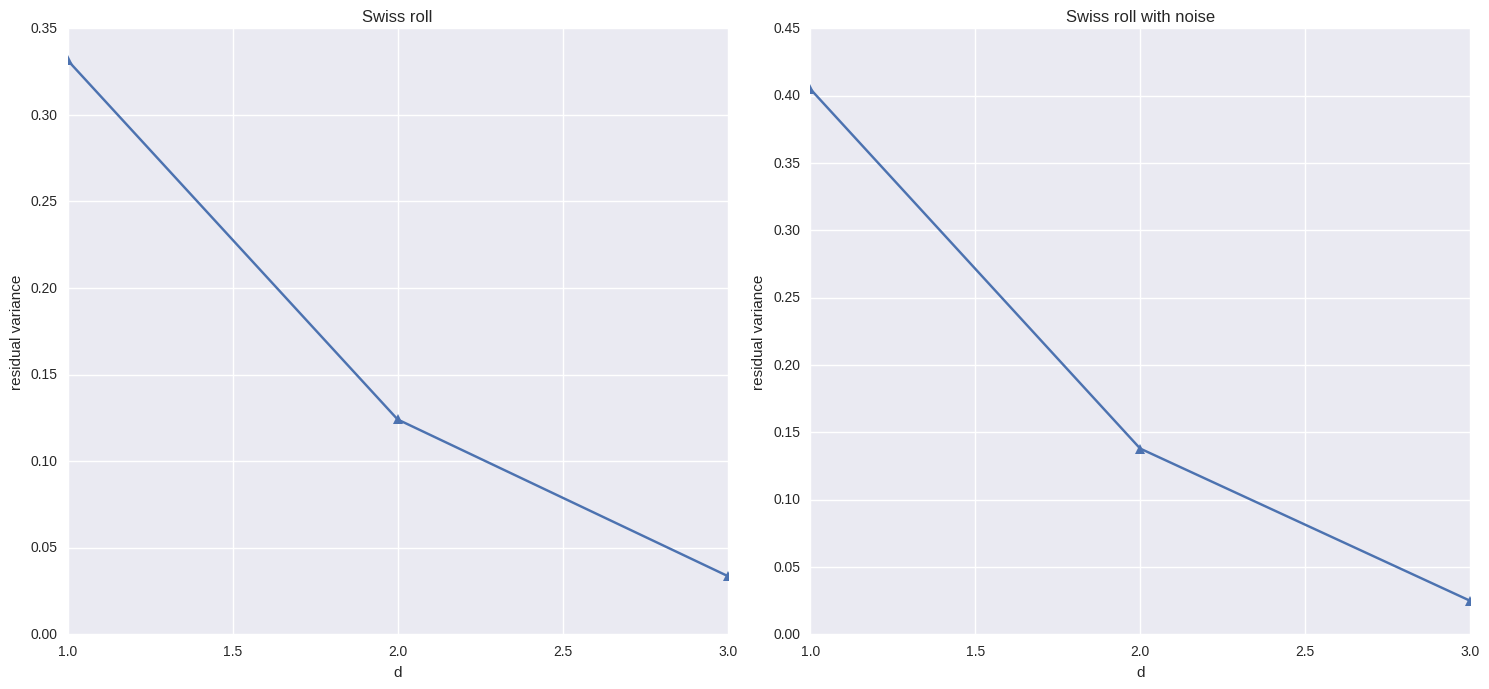

In [108]:
f, axarr = plt.subplots(1, 2, figsize=(15,7))
n_neighbors = 10

# dimensionality estimation
dims = list(range(1, 4))
var_of_d = compute_residual_variances_of_isomap(swiss_roll_data, dims, n_neighbors)
# plot dependence of residual variance from dimension
axarr[0].plot(dims,var_of_d,'-^')
axarr[0].set_title("Swiss roll")

var_of_d = compute_residual_variances_of_isomap(swiss_roll_with_noise_data, dims, n_neighbors)
# plot dependence of residual variance from dimension
axarr[1].plot(dims,var_of_d,'-^')
axarr[1].set_title("Swiss roll with noise")

for index in range(2):
    axarr[index].set_xlabel('d')
    axarr[index].set_ylabel('residual variance')

f.tight_layout()
plt.savefig("pic2_2.pdf")

Метод Isomap правильно определил размерность данных Swiss roll, даже на зашумленных данных.

#### Applying to Moons

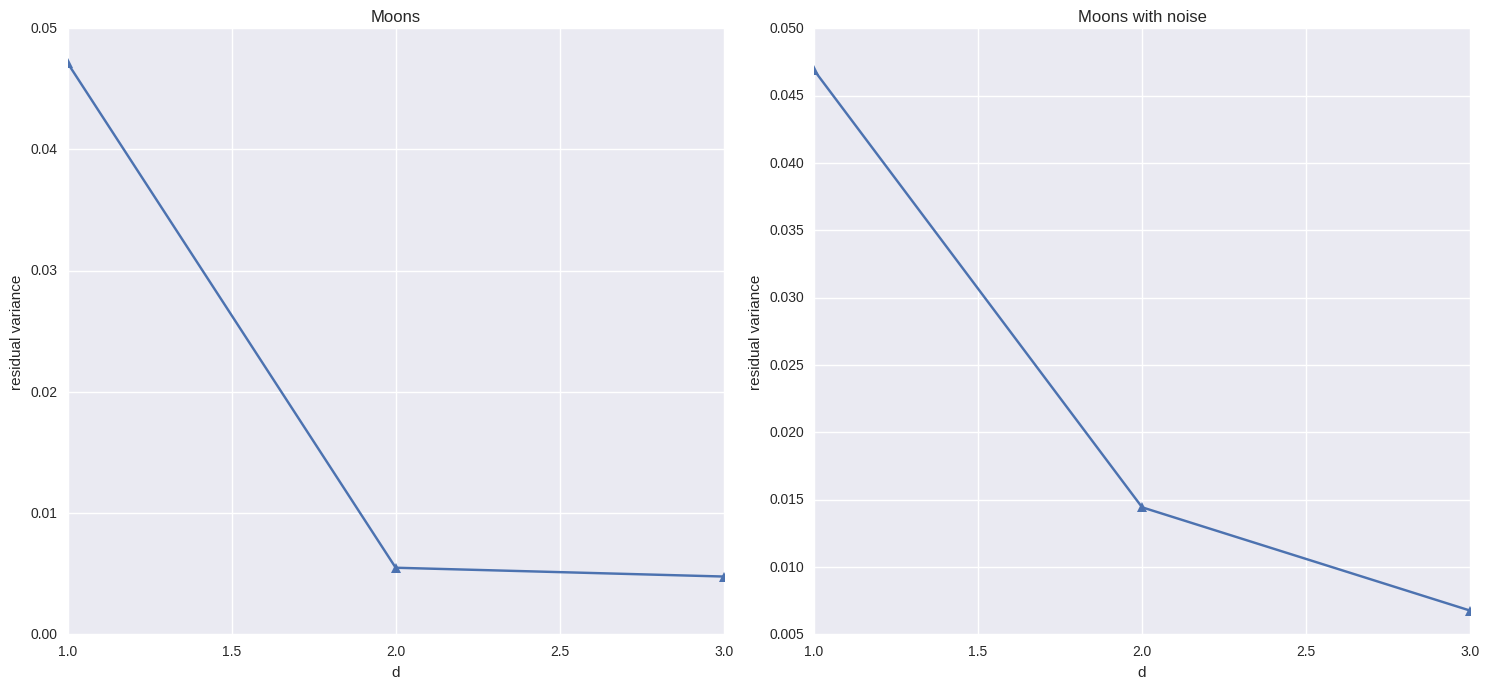

In [111]:
f, axarr = plt.subplots(1, 2, figsize=(15,7))
n_neighbors = 10

# dimensionality estimation
dims = list(range(1, 4))
var_of_d = compute_residual_variances_of_isomap(moons_data, dims, n_neighbors)
# plot dependence of residual variance from dimension
axarr[0].plot(dims,var_of_d,'-^')
axarr[0].set_title("Moons")

var_of_d = compute_residual_variances_of_isomap(moons_with_noise_data, dims, n_neighbors)
# plot dependence of residual variance from dimension
axarr[1].plot(dims,var_of_d,'-^')
axarr[1].set_title("Moons with noise")

for index in range(2):
    axarr[index].set_xlabel('d')
    axarr[index].set_ylabel('residual variance')

f.tight_layout()
plt.savefig("pic2_3.pdf")

#### Applying to S curve

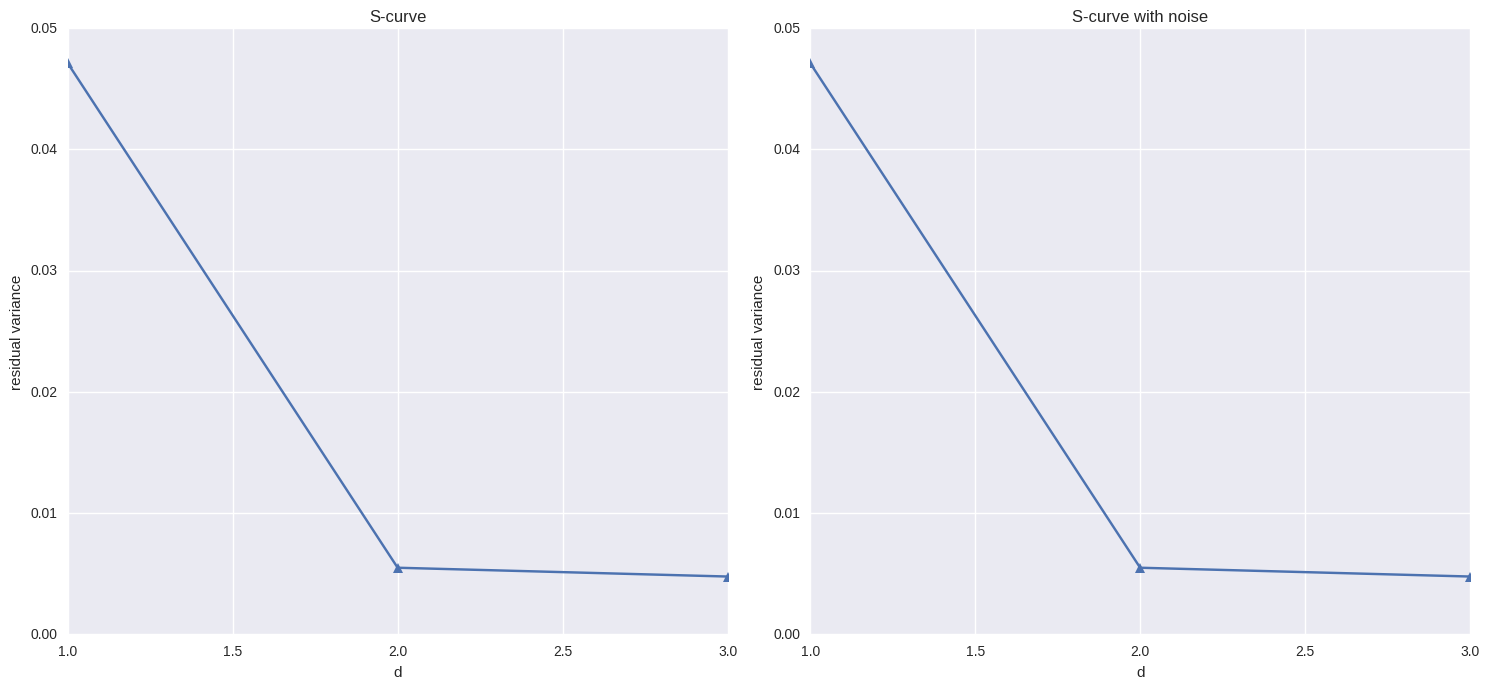

In [112]:
f, axarr = plt.subplots(1, 2, figsize=(15,7))
n_neighbors = 10

# dimensionality estimation
dims = list(range(1, 4))
var_of_d = compute_residual_variances_of_isomap(s_curve_data, dims, n_neighbors)
# plot dependence of residual variance from dimension
axarr[0].plot(dims,var_of_d,'-^')
axarr[0].set_title("S-curve")

var_of_d = compute_residual_variances_of_isomap(s_curve_with_noise_data, dims, n_neighbors)
# plot dependence of residual variance from dimension
axarr[1].plot(dims,var_of_d,'-^')
axarr[1].set_title("S-curve with noise")

for index in range(2):
    axarr[index].set_xlabel('d')
    axarr[index].set_ylabel('residual variance')

f.tight_layout()
plt.savefig("pic2_4.pdf")

#### Airfoils

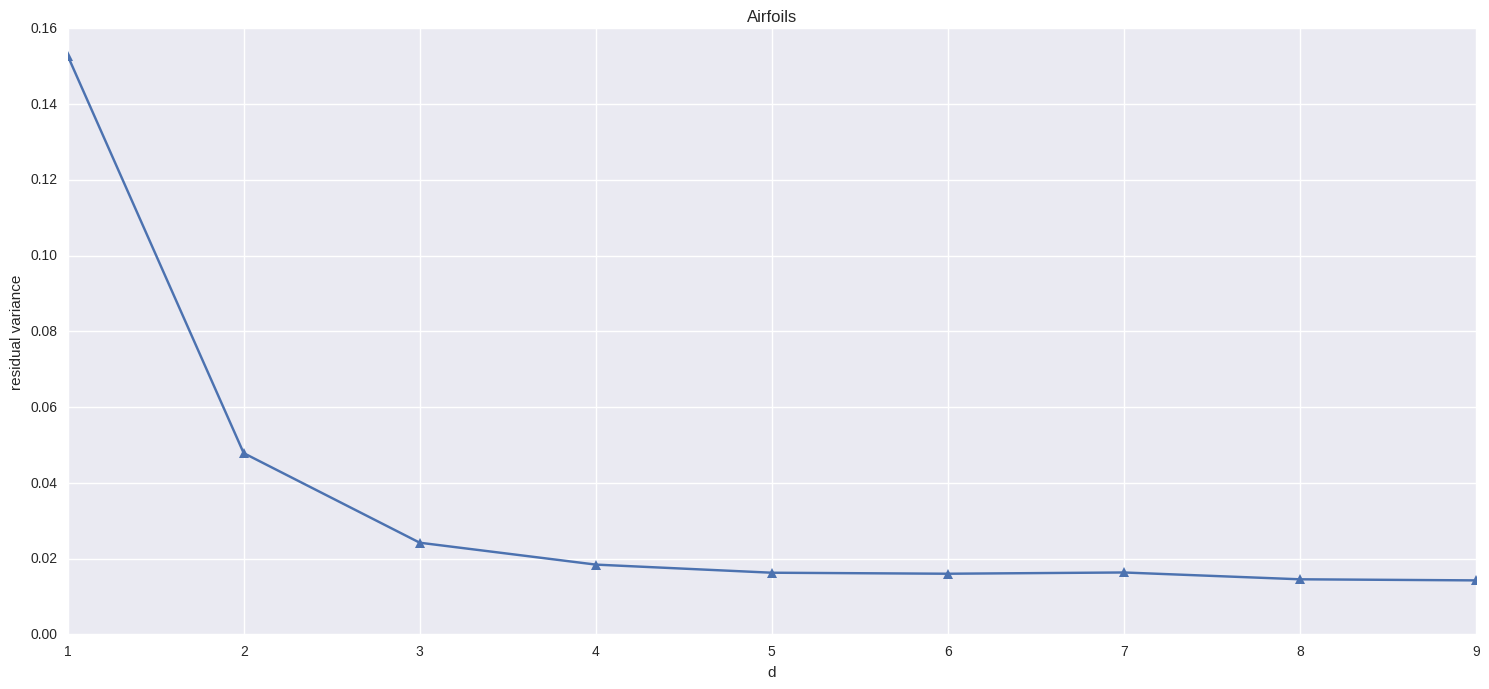

In [118]:
f = plt.figure(figsize=(15,7))
n_neighbors = 10

# dimensionality estimation
dims = list(range(1, 10))
var_of_d = compute_residual_variances_of_isomap(airfoils_data, dims, n_neighbors)
# plot dependence of residual variance from dimension
plt.plot(dims,var_of_d,'-^')
plt.title("Airfoils")

plt.xlabel('d')
plt.ylabel('residual variance')

f.tight_layout()
plt.savefig("pic2_5.pdf")

Исходно данные Airfoils размерности около 50. По графику видно, что данные примерно лежат в многообразии размерности 3-4.

#### Applying to MNIST

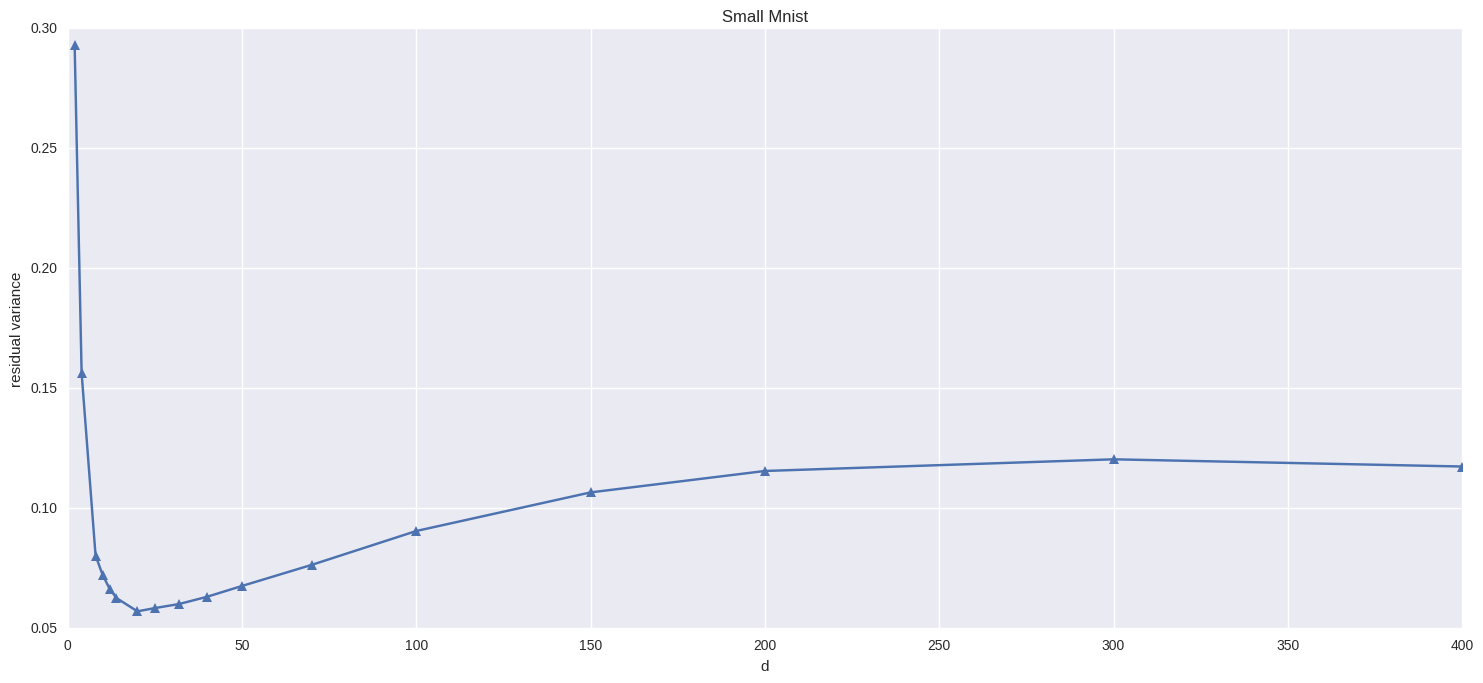

In [30]:
f = plt.figure(figsize=(15,7))
n_neighbors = 10

# dimensionality estimation
dims = [2, 4, 8, 10, 12, 14, 20, 25, 32, 40, 50, 70, 100, 150, 200, 300, 400, 500, 600, 750]
var_of_d = compute_residual_variances_of_isomap(small_mnist_data, dims, n_neighbors)
# plot dependence of residual variance from dimension
plt.plot(dims,var_of_d,'-^')
plt.title("Small Mnist")

plt.xlabel('d')
plt.ylabel('residual variance')

f.tight_layout()
plt.savefig("pic2_6.pdf")

Кажется разумным считать, что согласну второму алгоритму размерность данных MNIST 10-12.

#### Applying to Iris

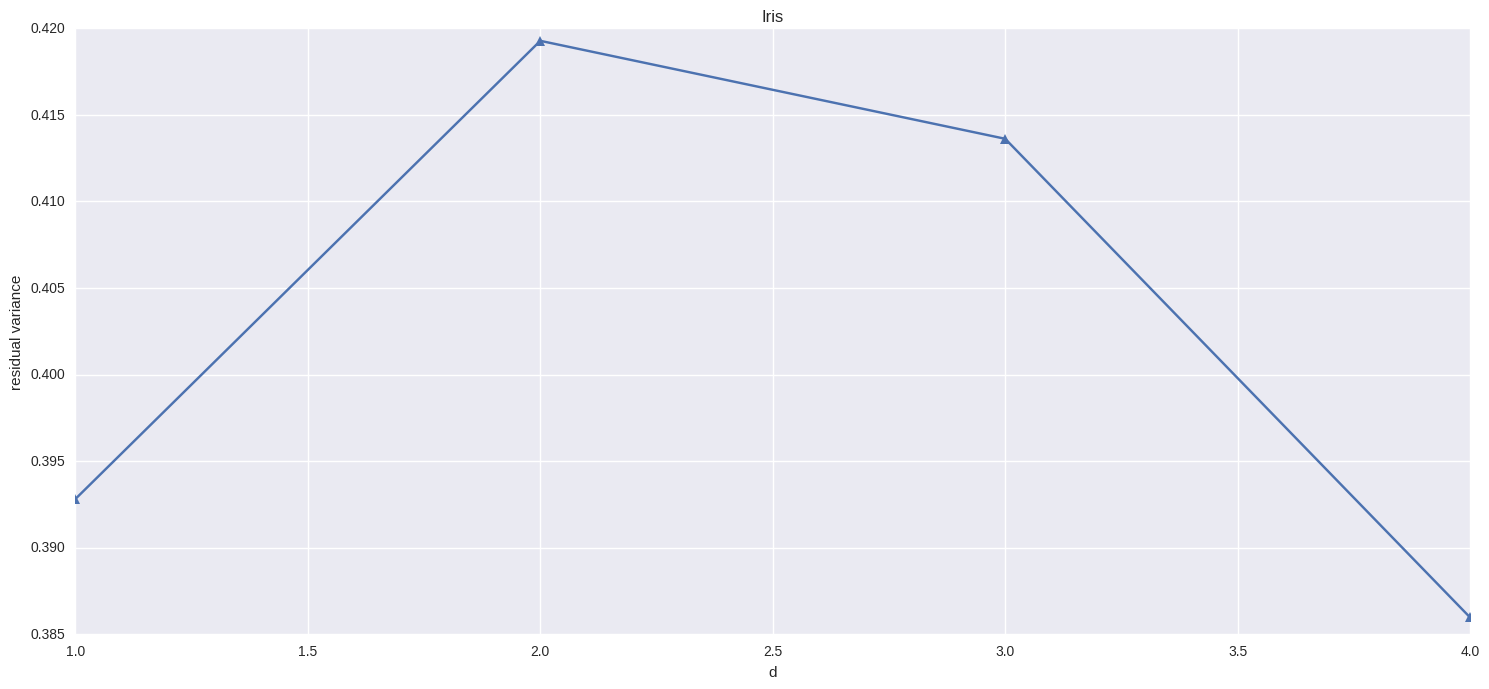

In [30]:
f = plt.figure(figsize=(15,7))
n_neighbors = 10


# dimensionality estimation
dims = list(range(1, iris_data.shape[1] + 1))
var_of_d = compute_residual_variances_of_isomap(iris_data, dims, n_neighbors)
# plot dependence of residual variance from dimension
plt.plot(dims,var_of_d,'-^')
plt.title("Iris")

plt.xlabel('d')
plt.ylabel('residual variance')

f.tight_layout()
plt.savefig("pic2_7.pdf")

С гиперпараметром n=10 алгоритм выдал невразумительный график зависимости residual variance от размерности d. Попробуем при n=80.

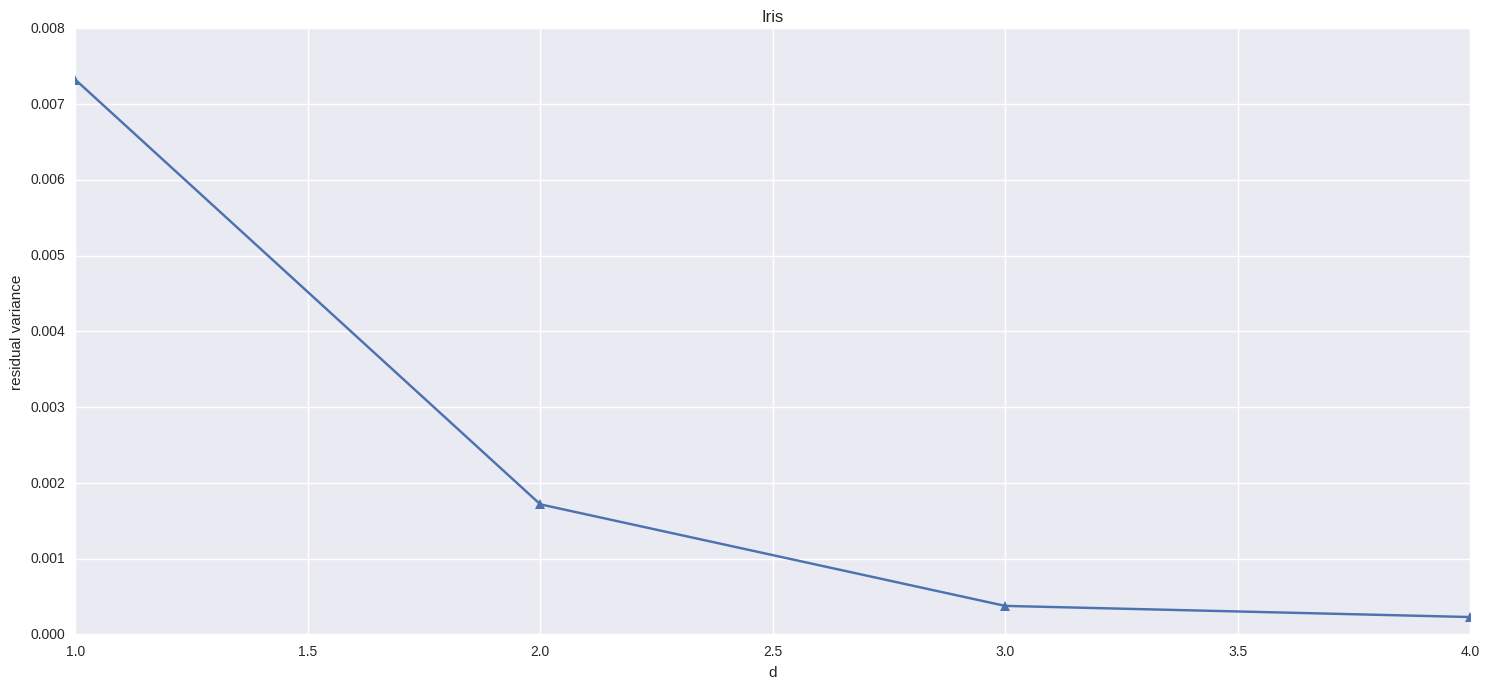

In [32]:
f = plt.figure(figsize=(15,7))
n_neighbors = 80

# dimensionality estimation
dims = list(range(1, iris_data.shape[1] + 1))
var_of_d = compute_residual_variances_of_isomap(iris_data, dims, n_neighbors)
# plot dependence of residual variance from dimension
plt.plot(dims,var_of_d,'-^')
plt.title("Iris")

plt.xlabel('d')
plt.ylabel('residual variance')

f.tight_layout()
plt.savefig("pic2_7.pdf")

Видимо, теперь алгоритм Isomap дал более качественные результаты. И, судя по графику, можем заключить, что размерность 2.

#### Applying to Diabetes dataset

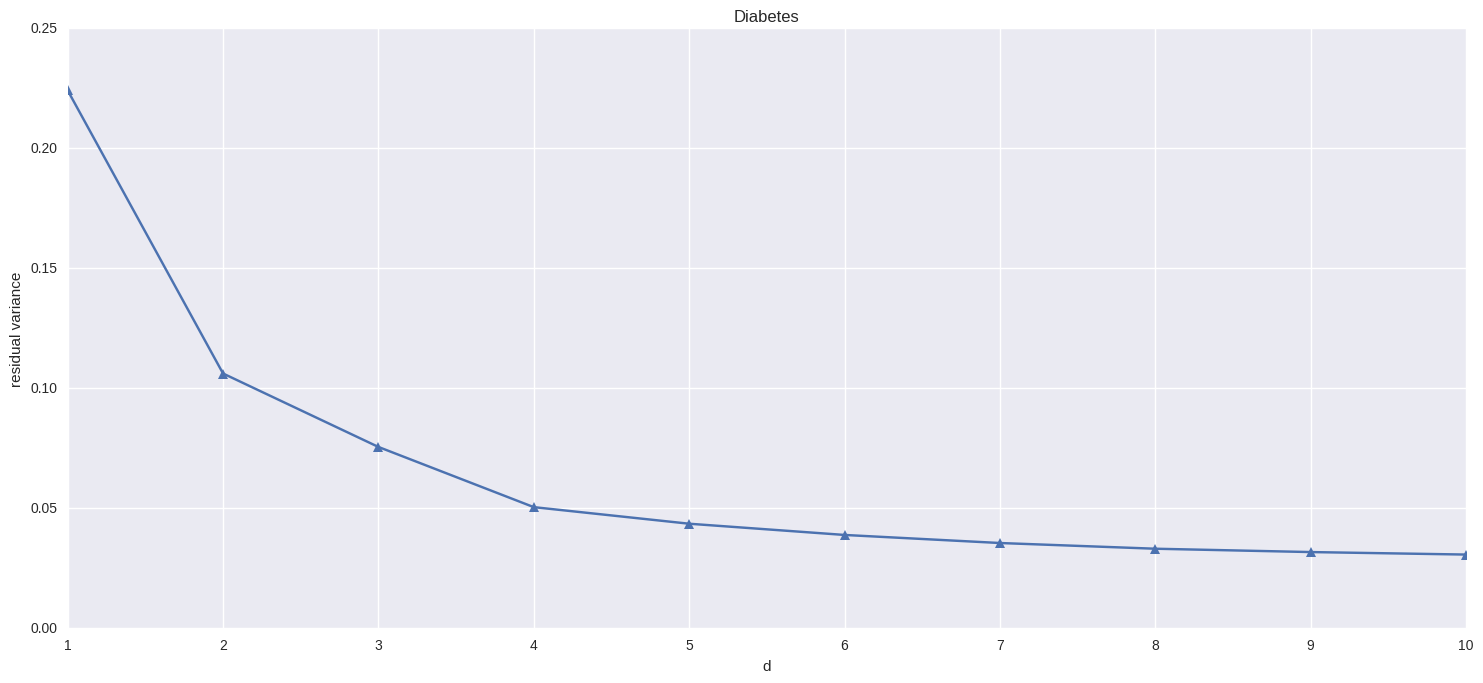

In [34]:
f = plt.figure(figsize=(15,7))
n_neighbors = 10


# dimensionality estimation
dims = list(range(1, diabetes_data.shape[1] + 1))
var_of_d = compute_residual_variances_of_isomap(diabetes_data, dims, n_neighbors)
# plot dependence of residual variance from dimension
plt.plot(dims,var_of_d,'-^')
plt.title("Diabetes")

plt.xlabel('d')
plt.ylabel('residual variance')

f.tight_layout()
plt.savefig("pic2_8.pdf")

Результат - 4.

#### Applying to Boston house-prices dataset

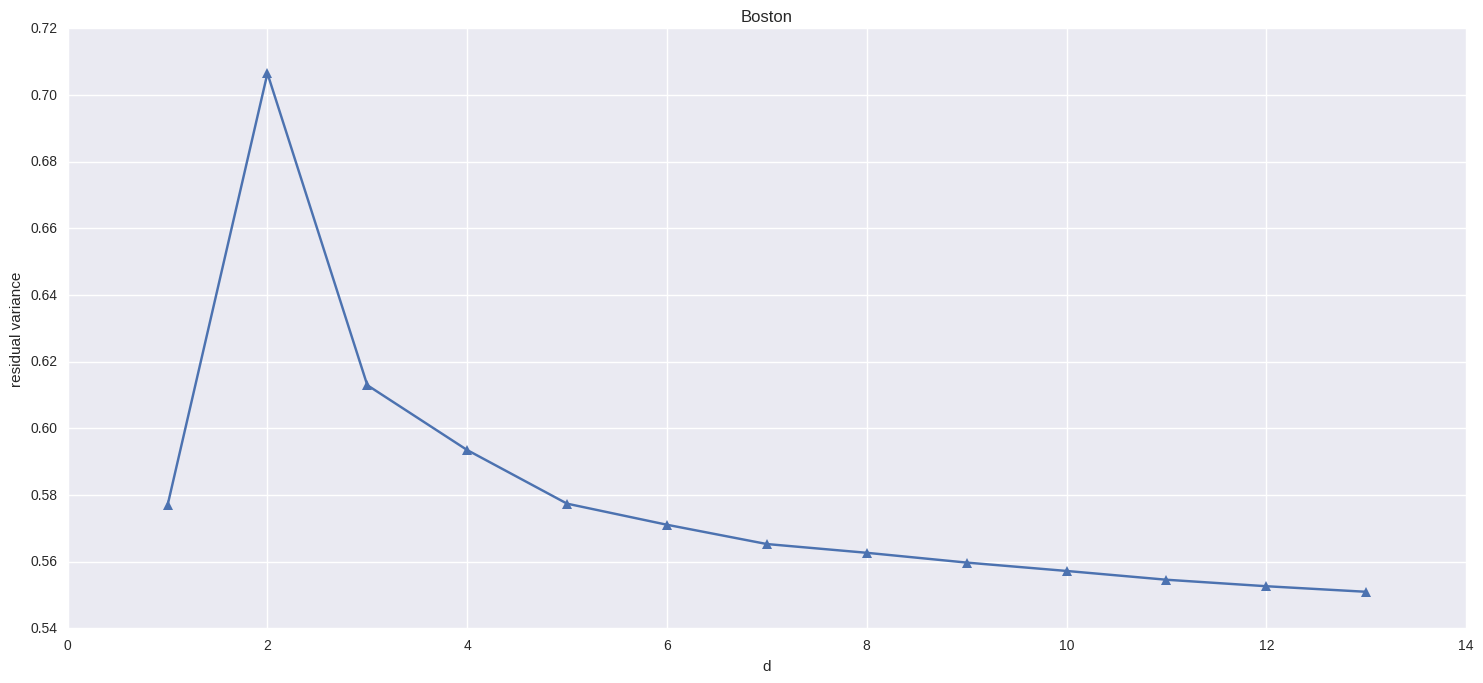

In [38]:
f = plt.figure(figsize=(15,7))
n_neighbors = 10

# dimensionality estimation
dims = list(range(1, boston_data.shape[1] + 1))
var_of_d = compute_residual_variances_of_isomap(boston_data, dims, n_neighbors)
# plot dependence of residual variance from dimension
plt.plot(dims,var_of_d,'-^')
plt.title("Boston")

plt.xlabel('d')
plt.ylabel('residual variance')

f.tight_layout()
plt.savefig("pic2_9.pdf")

От 5 до 8.

#### Applying to Olivetti faces data-set from AT&T

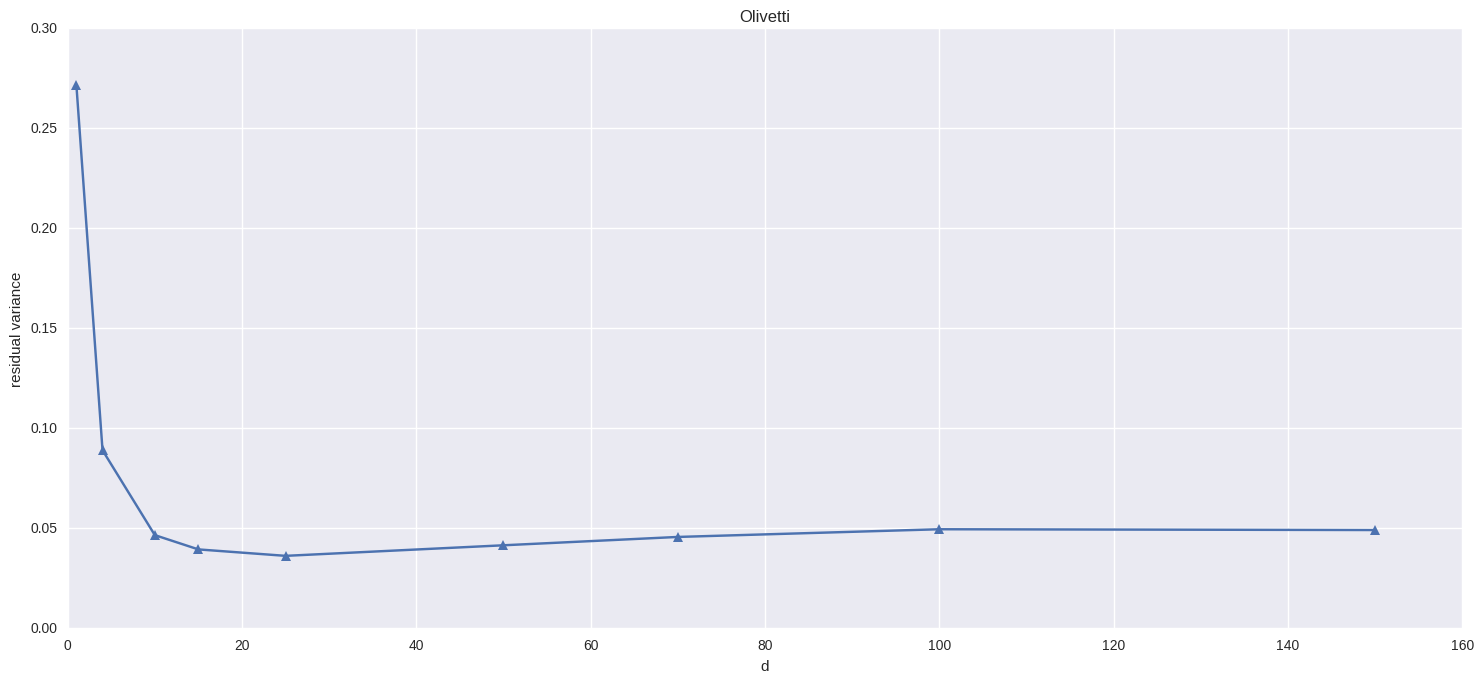

In [37]:
f = plt.figure(figsize=(15,7))
n_neighbors = 10

# dimensionality estimation
dims = [1, 4, 10, 15, 25, 50, 70, 100, 150, 300, 500, 800, 1400, 2000, 3000, 4000]
var_of_d = compute_residual_variances_of_isomap(olivetti_data, dims, n_neighbors)
# plot dependence of residual variance from dimension
plt.plot(dims,var_of_d,'-^')
plt.title("Olivetti")

plt.xlabel('d')
plt.ylabel('residual variance')

f.tight_layout()
plt.savefig("pic2_10.pdf")

От 10 до 15.

#### Applying to California housing dataset

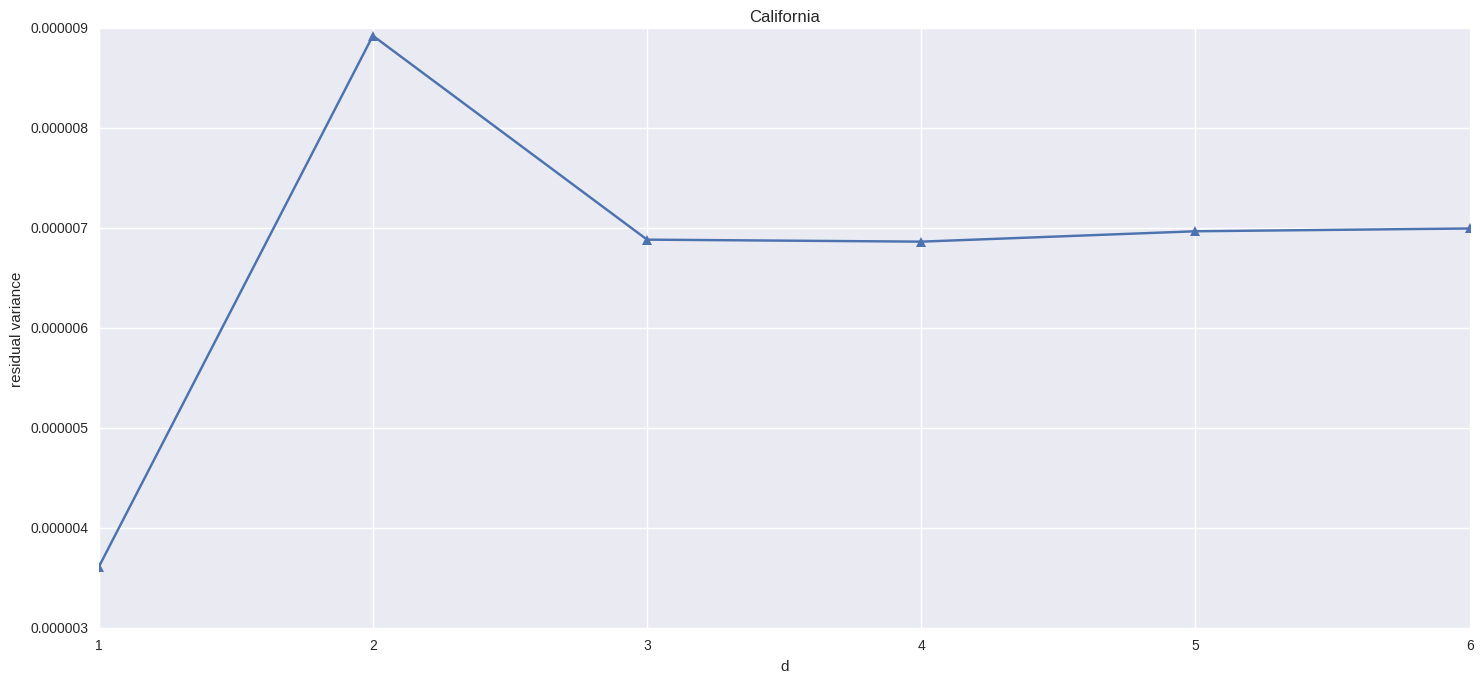

In [19]:
f = plt.figure(figsize=(15,7))
n_neighbors = 300

# dimensionality estimation
california_data_reduced = california_data[:4000]
dims = [1, 2, 3, 4, 5, 6]
var_of_d = compute_residual_variances_of_isomap(california_data_reduced, dims, n_neighbors)
# plot dependence of residual variance from dimension
plt.plot(dims,var_of_d,'-^')
plt.title("California")

plt.xlabel('d')
plt.ylabel('residual variance')

f.tight_layout()
plt.savefig("pic2_11.pdf")

Для 20000 объектов не хватило памяти, поэтому обрезал выборку до 4000 и запустил алгоритм.

На размерности 3 качество второго алгоритма перестает улучшаться на данных California

#### Applying to LFW

Данные очень высокой размерности. Для работы алгоритма Isomap на данных LFW требуется очень много времени и памяти, поэтому удалось произвести вычисления только для урезанной выборки размера до 300.

In [23]:
def job():
    global flag
    flag = True
    count_successful_experiments = 0
    count_objects = 250
    lfw_data_reduced = lfw_data[:count_objects]
    for n_neighbors in [3, 5, 10, 20, 50, 100]:
        try:
            print("experiment with n_neighbors={}".format(n_neighbors))
            f = plt.figure(figsize=(15,7))

            # dimensionality estimation
            dims = [1, 2, 4, 8, 20, 28, 36, 50, 70]
            var_of_d = compute_residual_variances_of_isomap(lfw_data_reduced, dims, n_neighbors)
            # plot dependence of residual variance from dimension
            plt.plot(dims,var_of_d,'-^')
            plt.title("Labeled faces wild. n = {}".format(n_neighbors))

            plt.xlabel('d')
            plt.ylabel('residual variance')

            f.tight_layout()
            plt.savefig("new_pic2_12_{}.pdf".format(count_successful_experiments))

        except Exception as err:
            print(err)
        else:
            count_successful_experiments += 1
    print("Всего удачно: {}".format(count_successful_experiments))
    flag = False
    plt.show()

Если верить результатам эксперимента на такой маленькой выборке - размера 250, то результат второго алгоритма - около 20.

### Granata-Carnevale method
Original paper: [Daniele Granata, Vincenzo Carnevale: Accurate Estimation of the Intrinsic Dimension Using Graph Distances: Unraveling the Geometric Complexity of Datasets](https://www.nature.com/articles/srep31377)

#### Algorithm
Implementation is based on: https://github.com/dgranata/Intrinsic-Dimension

Беда метода в том, что возможно придётся подгонять r_max по графику (второму), чтоб заработало и на 2d всё ломается.

In [16]:
import sys,argparse
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.sparse import csr_matrix
from scipy.spatial import distance
from sklearn.neighbors import kneighbors_graph, radius_neighbors_graph
from sklearn.utils.graph import graph_shortest_path

In [17]:
def func(x,a,b,c):
    return a*np.log(np.sin(x/1*np.pi/2.))
         
def func2(x,a):
    return -a/2.*(x-1)**2

def func3(x,a,b,c):
    return np.exp(c)*np.sin(x/b*np.pi/2.)**a

def id_fit(X = None, me = 'euclidean', matrix = False, dist_mat = None, n_neighbors = 3, radius = 0,
           n_bins = 50, r_max = 0, r_min = -10, direct = False, projection = False, print_results = False, plot_results = False):
    """
	NOTE: it is important to have a smooth histogram for accurate fitting.
     
	 X 				- data, if you have no distance matrix
     metric 		- define the scipy distance to be used   (Default: euclidean or hamming for MSA)
     matrix 		- if you want your oun distances between all objects, set matrix to True and enter dist_mat (Default = False)
	 dist_mat		- square matrix of distances if matrix == True
     n_neighbors 	- nearest_neighbors parameter (Default k=3)
     radius 		- use neighbor radius instead of nearest_neighbors (Opt, Default = 0)
     n_bins 		- number of bins for distance histogram (Defaul = 50)
     r_max 			- fix the value of distance distribution maximum in the fit (Opt, Default = 0)
     r_min			- fix the value of shortest distance considered in the fit 
						(Opt, -1 force the standard fit, avoiding consistency checks, Default = -10)
     direct 		- analyze the direct (not graph) distances (Opt, Default = False)
     projection		- produce an Isomap projection using the first ID components (Opt, Default = False)
     print_results  - output results to console or not (Default = False)
     plot_results   - plot density estimation, log(r/r_max) vs log(p(r)/p(r_max)), root mean square deviation between 
                     the observed distribution and the one of a D-dimensional hypersphere as a function of D(RMSD) vs dimension
     
     returns:
     Dfit           - least square fit for p(r) = C(sin(r))^{D-1}
     Dmin           - argmin of RMSD
     """

    rmax = r_max
    MSA = False
    if me == 'hamming':
        MSA = True
    mm = -10000
    input_f = "results"

    data = X
    if matrix: me = 'as from the input file'

    if radius > 0.:
        filename = str(input_f.split('.')[0]) + 'R' + str(radius)
    else:
        filename = str(input_f.split('.')[0]) + 'K' + str(n_neighbors)
    # 0

    # 1 Computing geodesic distance on connected points of the input file and relative histogram
    if matrix:
        if data.shape[1] == 1:
            dist_mat = distance.squareform(data.ravel())
            mm = dist_mat.shape[1]
        elif data.shape[1] == 3:
            mm = int(max(data[:, 1]))
            dist_mat = np.zeros((mm, mm))
            for i in range(0, data.shape[0]):
                dist_mat[int(data[i, 0]) - 1, int(data[i, 1]) - 1] = data[i, 2]
                dist_mat[int(data[i, 1]) - 1, int(data[i, 0]) - 1] = data[i, 2]
        else:
            print('ERROR: The distances input is not in the right matrix format');  sys.exit(2)
        if print_results:
            print("\n# points: ", mm)

        A = np.zeros((mm, mm))
        rrr = []

        if direct: C = dist_mat
        if radius > 0.:
            for i in range(0, mm):
                ll = dist_mat[i] < radius
                A[i, ll] = dist_mat[i, ll]
        else:
            rrr = np.argsort(dist_mat)
            for i in range(0, mm):
                ll = rrr[i, 0:n_neighbors + 1]
                A[i, ll] = dist_mat[i, ll]
            radius = A.max()
        C = graph_shortest_path(A, directed=False)

    else:
        if direct:
            C = distance.squareform(distance.pdist(data, me));
        elif radius > 0.:
            A = radius_neighbors_graph(data, radius, metric=me, mode='distance')
            C = graph_shortest_path(A, directed=False)
        else:
            A = kneighbors_graph(data, n_neighbors, metric=me, mode='distance')
            C = graph_shortest_path(A, directed=False)
            radius = A.max()

    C = np.asmatrix(C)
    connect = np.zeros(C.shape[0])
    conn = np.zeros(C.shape[0])
    for i in range(0, C.shape[0]):
        conn_points = np.count_nonzero(C[i])
        conn[i] = conn_points
        if conn_points > C.shape[0] / 2.:
            connect[i] = 1
        else:
            C[i] = 0
    
    if np.count_nonzero(connect) > C.shape[0] / 2.:
        if print_results:
            print('Number of connected points:', np.count_nonzero(connect), '(', 100 * np.count_nonzero(connect) / C.shape[0],
                  '% )')
    else:
        print('The neighbors graph is highly disconnected, increase K or Radius parameters'); sys.exit(2)

    indices = np.nonzero(np.triu(C, 1))
    dist_list = np.asarray(C[indices])[-1]

    h = np.histogram(dist_list, n_bins)
    dx = h[1][1] - h[1][0]
    
    fig,ax = None,None
    if plot_results:
        fig,ax = plt.subplots(1,3,figsize=(15,5))
        ax[0].plot(h[1][0:n_bins] + dx / 2, h[0], 'o-', label='histogram')
        ax[0].set_xlabel('r')
        ax[0].set_ylabel('N. counts')
        ax[0].legend()
    distr_x = []
    distr_y = []

    avg = np.mean(dist_list)
    std = np.std(dist_list)

    if rmax > 0:
        avg = rmax
        if print_results:
            print('\nNOTE: You fixed r_max for the initial fitting, average will have the same value')
    else:
        mm = np.argmax(h[0])
        rmax = h[1][mm] + dx / 2

    if r_min >= 0:
        if print_results:
            print('\nNOTE: You fixed r_min for the initial fitting: r_min = ', r_min)
    if r_min == -1:
        if print_results:
            print('\nNOTE: You forced r_min to the standard procedure in the initial fitting')
    if print_results:
        print('\nDistances Statistics:')
        print('Average, standard dev., n_bin, bin_size, r_max, r_NN_max:', avg, std, n_bins, dx, rmax, radius, '\n')
    # 1
    tmp = 1000000
    if (r_min >= 0):
        tmp = r_min
    elif (r_min == -1):
        tmp = rmax - std

    if (np.fabs(rmax - avg) > std):
        print('ERROR: There is a problem with the r_max detection:')
        print(
        '       usually either the histogram is not smooth enough (you may consider changing the n_bins with option -b)')
        print(
        '       or r_max and r_avg are too distant and you may consider to fix the first detection of r_max with option -M')
        print('       or to change the neighbor parameter with (-r/-k)')
        plt.show()
        sys.exit()

    elif (rmax <= min(radius + dx, tmp)):
        print(
        'ERROR: There is a problem with the r_max detection, it is shorter than the largest distance in the neighbors graph.')
        print(
        '       You may consider to fix the first detection of r_max with option -M and/or the r_min with option -n to fix the fit range')
        print('       or to decrease the neighbors parameter with (-r/-k)')
        plt.show()
        sys.exit()

    # 2 Finding actual r_max and std. dev. to define fitting interval [rmin;rM]
    distr_x = h[1][0:n_bins] + dx / 2
    distr_y = h[0][0:n_bins]

    res = np.empty(25)
    left_distr_x = np.empty(n_bins)
    left_distr_y = np.empty(n_bins)
    left_distr_x = distr_x[np.logical_and(distr_x[:] > rmax - std, distr_x[:] < rmax + std / 2.0)]
    left_distr_y = np.log(distr_y[np.logical_and(distr_x[:] > rmax - std, distr_x[:] < rmax + std / 2.0)])
    coeff = np.polyfit(left_distr_x, left_distr_y, 2, full='False')
    a0 = coeff[0][0]
    b0 = coeff[0][1]
    c0 = coeff[0][2]

    rmax = -b0 / a0 / 2.0
    if (r_max > 0): rmax = r_max
    std = np.sqrt(-1 / a0 / 2.)
    left_distr_x = distr_x[np.logical_and(distr_x[:] > rmax - std, distr_x[:] < rmax + std / 2.)]
    left_distr_y = np.log(distr_y[np.logical_and(distr_x[:] > rmax - std, distr_x[:] < rmax + std / 2.)])
    coeff = np.polyfit(left_distr_x, left_distr_y, 2, full='False')
    a = coeff[0][0]
    b = coeff[0][1]
    c = coeff[0][2]

    rmax_old = rmax
    std_old = std
    rmax = -b / a / 2.
    std = np.sqrt(-1 / a / 2.)  # it was a0
    rmin = max(rmax - 2 * np.sqrt(-1 / a / 2.) - dx / 2, 0.)
    if (r_min >= 0):
        rmin = r_min
    elif (rmin < radius and r_min != -1):
        rmin = radius
        if print_results:
            print(
            '\nWARNING: For internal consistency r_min has been fixed to the largest distance (r_NN_max) in the neighbors graph.')
            print(
            '         It is possible to reset the standard definition of r_min=r_max-2*sigma running with option "-n -1" ')
            print('         or you can use -n to manually define a desired value (Example: -n 0.1)\n')

    rM = rmax + dx / 4

    if (np.fabs(rmax - rmax_old) > std_old / 4):  # fit consistency check
        if print_results:
            print(
            '\nWARNING: The histogram is probably not smooth enough (you may try to change n_bin with -b), rmax is fixed to the value of first iteration\n')
            print(rmax,rmax_old,std/4,std_old/4)
        rmax = rmax_old
        a = a0
        b = b0
        c = c0
        if (r_min >= 0):
            rmin = r_min
        elif (rmin < radius and r_min != -1):
            rmin = radius
            if print_results:
                print(
                '\nWARNING2: For internal consistency r_min has been fixed to the largest distance in the neighbors graph (r_NN_max).')
                print(
                '          It is possible to reset the standard definition of r_min=r_max-2*sigma running with option "-n -1" ')
                print('          or you can use -n to manually define a desired value (Example: -n 0.1)\n')
        rM = rmax + dx / 4
    # 2

    # 3 Gaussian Fitting to determine ratio R

    left_distr_x = distr_x[
                       np.logical_and(np.logical_and(distr_x[:] > rmin, distr_x[:] <= rM), distr_y[:] > 0.000001)] / rmax
    left_distr_y = np.log(
        distr_y[np.logical_and(np.logical_and(distr_x[:] > rmin, distr_x[:] <= rM), distr_y[:] > 0.000001)]) - (
                                                                                                             4 * a * c - b ** 2) / 4. / a

    fit = curve_fit(func2, left_distr_x, left_distr_y)
    ratio = np.sqrt(fit[0][0])
    y1 = func2(left_distr_x, fit[0][0])
    # 3

    # 4 Geodesics D-Hypersphere Distribution Fitting to determine Dfit

    fit = curve_fit(func, left_distr_x, left_distr_y)
    Dfit = (fit[0][0]) + 1

    y2 = func(left_distr_x, fit[0][0], fit[0][1], fit[0][2])
    # 4


    # 5 Determination of Dmin

#     D_file = open('D_residual_{0}.dat'.format(filename), "w")

    for D in range(1, 26):
        y = (func(left_distr_x, D - 1, 1, 0))
        for i in range(0, len(y)):
            res[D - 1] = np.linalg.norm((y) - (left_distr_y)) / np.sqrt(len(y))
#         D_file.write("%s " % D)
#         D_file.write("%s\n" % res[D - 1])

    Dmin = np.argmax(-res) + 1

    y = func(left_distr_x, Dmin - 1, fit[0][1], 0)
    # 5

    # 6 Printing results
    if print_results:
        print('\nFITTING PARAMETERS:')
        print('rmax, std. dev., rmin', rmax, std, rmin)
        print('\nFITTING RESULTS:')
        print('R, Dfit, Dmin', ratio, Dfit, Dmin, '\n')

    if plot_results:
        ax[1].plot(left_distr_x, left_distr_y, 'o-', label=str(input_f.split('.')[0]))
        ax[1].plot(left_distr_x, y1, label='Gaussian fit for R ratio')
        ax[1].plot(left_distr_x, y2, label='D-Hypersphere Fit for D_fit')
        ax[1].plot(left_distr_x, y, label='D_min-Hypersphere Distribution')
        ax[1].set_xlabel('r/r$_{max}$')
        ax[1].set_ylabel('log p(r)/p(r$_{max}$)')
        ax[1].legend(loc=4)
        
        ax[2].plot(range(1, 26), res, 'o-', label=str(input_f.split('.')[0]) + ' D_min')
        ax[2].legend()
        ax[2].set_xlabel('D')
        ax[2].set_ylabel('RMDS')
#         plt.show()
    #     plt.savefig(str(input_f.split('.')[0]) + '_Dmin.png')

    # 6

    # 7 Optional: Isomap projection
    if projection:
        from sklearn.decomposition import KernelPCA
        C2 = (distance.squareform(dist_list)) ** 2
        C2 = -.5 * C2
        obj_pj = KernelPCA(n_components=100, kernel="precomputed")
        proj = obj_pj.fit_transform(C2)
        np.savetxt('proj_' + str(input_f.split('.')[0]) + '.dat', proj[:, 0:Dmin])
    return Dfit,Dmin
#     print('NOTE: it is important to have a smooth histogram for accurate fitting\n')


#### Применение к сферам

In [125]:
spheres_dimensions = pd.DataFrame()
spheres_dimensions['Sphere dimension'] = list(range(2,len(d_sphere_data)+2))
spheres_dimensions['D_min'] = list(range(len(spheres_dimensions)))
spheres_dimensions['D_fit'] = np.round(np.linspace(0,1,len(spheres_dimensions)),2)
for i in range(1,len(d_sphere_data)):
    D_fit,D_min = id_fit(d_sphere_data[i],r_max = 1.5,n_neighbors=10,direct = True,plot_results=False)
    spheres_dimensions['D_min'][i] = D_min
    spheres_dimensions['D_fit'][i] = np.round(D_fit,2)
pd.options.display.max_columns = 30
spheres_dimensions.transpose()

/home/alexgavr/anaconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/alexgavr/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/alexgavr/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
Sphere dimension,2.0,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,11.00,12.00,13.00,14.00,15.00,16.00,17.00,18.00,19.00,20.00,21.00,22.00,23.00,24.00,25.00,26.00,27.00,28.00,29.00,30.00
D_min,0.0,3.00,4.00,5.00,6.00,8.00,9.00,11.00,12.00,14.00,12.00,13.00,14.00,15.00,16.00,17.00,17.00,18.00,19.00,19.00,20.00,21.00,21.00,22.00,23.00,23.00,24.00,24.00,24.00
D_fit,0.0,2.99,3.84,4.85,6.31,7.67,9.29,10.62,11.77,13.53,12.19,13.21,14.04,14.83,15.77,16.51,17.21,17.95,18.59,19.46,20.38,20.57,21.49,21.95,22.63,22.96,24.01,24.26,24.39


#### Applying to Swiss roll

In [93]:
swiss_roll_table = pd.DataFrame({'D_min':0, 'D_fit':0}, index=['clean', 'with noise'])
r_max = 1.8
n_neighbors = 16

D_fit,D_min = id_fit(swiss_roll_data, r_max = r_max, n_neighbors=n_neighbors, direct = True, plot_results=False)
swiss_roll_table.ix['clean', 'D_min'] = D_min
swiss_roll_table.ix['clean', 'D_fit'] = np.round(D_fit,2)

D_fit,D_min = id_fit(swiss_roll_with_noise_data, r_max = 2, n_neighbors=10, direct = True, plot_results=False)
swiss_roll_table.ix['with noise', 'D_min'] = D_min
swiss_roll_table.ix['with noise', 'D_fit'] = np.round(D_fit,2)

swiss_roll_table.transpose()

/home/alexgavr/anaconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


,clean,with noise
D_fit,3.31,4.94
D_min,3.00,5.00


Неудовлетворительные результаты. Действиетльная размерность - 2.

#### Applying to Moons

In [113]:
moons_table = pd.DataFrame({'D_min':0, 'D_fit':0}, index=['clean', 'with noise'])
r_max = 1.5
n_neighbors = 15

D_fit,D_min = id_fit(moons_data, r_max = r_max, n_neighbors=n_neighbors, direct = True, plot_results=False)
moons_table.ix['clean', 'D_min'] = D_min
moons_table.ix['clean', 'D_fit'] = np.round(D_fit,2)

D_fit,D_min = id_fit(moons_with_noise_data, r_max = 2, n_neighbors=10, direct = True, plot_results=False)
moons_table.ix['with noise', 'D_min'] = D_min
moons_table.ix['with noise', 'D_fit'] = np.round(D_fit,2)

moons_table.transpose()

/home/alexgavr/anaconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


,clean,with noise
D_fit,2.04,0.23
D_min,2.00,1.00


Перебирая параметры r_max и n_neighbors, я добивался правильных результатов на чистых данных Moons. На зашумленных вразумительного ответа так и не удалось получить. Возможно, дело в размере выборки.

#### Applying to S curve

In [131]:
s_curve_table = pd.DataFrame({'D_min':0, 'D_fit':0}, index=['clean', 'with noise'])
r_max = 1.5
n_neighbors = 10

D_fit,D_min = id_fit(s_curve_data, r_max = r_max, n_neighbors=n_neighbors, direct = True, plot_results=False)
s_curve_table.ix['clean', 'D_min'] = D_min
s_curve_table.ix['clean', 'D_fit'] = np.round(D_fit,2)

D_fit,D_min = id_fit(s_curve_with_noise_data, r_max = 2, n_neighbors=10, direct = True, plot_results=False)
s_curve_table.ix['with noise', 'D_min'] = D_min
s_curve_table.ix['with noise', 'D_fit'] = np.round(D_fit,2)

s_curve_table.transpose()

/home/alexgavr/anaconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


,clean,with noise
D_fit,2.04,0.02
D_min,2.00,1.00


Те же результаты, что и с данными Moons.

#### Применение к Airfoils

In [164]:
airfoils_table = pd.DataFrame({'D_min':0, 'D_fit':0}, index=['real data'])

count_success = 0
count_exceptions = 0
for r_max in [0.1, 0.5, 1, 2, 10, 40, 50, 100, 1000, 10000, 100000, 1000000, 1000*1000*1000]:
    for n_neighbors in [2, 4, 10, 15, 50, 1000, 10000]:
        try:
            D_fit,D_min = id_fit(airfoils_data, r_max = r_max, n_neighbors=n_neighbors, direct = True, plot_results=False)
            count_success += 1
            print("На r_max {}, n_neigbors {}:\n \
            D_fit = {}, D_min = {}".format(r_max, n_neighbors, D_fit, D_min))
        except Exception as err:
            count_exceptions += 1
print("Количество неудач: {}".format(count_exceptions))
print("Количство удач: {}".format(count_success))

Количество неудач: 91
Количство удач: 0


Не получается применить третий алгоритм к данным Airfoils при различных параметрах.

#### Применение к MNIST

In [167]:
small_mnist_table = pd.DataFrame({'D_min':0, 'D_fit':0}, index=['real data'])

count_success = 0
count_exceptions = 0
for r_max in [5000, 7000, 10000, 50000]:
    for n_neighbors in [2, 4, 10, 15, 30, 50, 1000]:
        try:
            D_fit,D_min = id_fit(small_mnist_data, r_max = r_max, n_neighbors=n_neighbors, direct = False, plot_results=False)
            count_success += 1
            print("На r_max {}, n_neigbors {}:\n \
            D_fit = {}, D_min = {}".format(r_max, n_neighbors, D_fit, D_min))
        except Exception as err:
            count_exceptions += 1
print("Количество неудач: {}".format(count_exceptions))
print("Количство удач: {}".format(count_success))

/home/alexgavr/anaconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


На r_max 5000, n_neigbors 2:
             D_fit = 6.075607061709168, D_min = 6
На r_max 7000, n_neigbors 2:
             D_fit = 7.10734356918312, D_min = 7
На r_max 7000, n_neigbors 4:
             D_fit = 9.176386760898462, D_min = 9
На r_max 7000, n_neigbors 10:
             D_fit = 5.2457328678024435, D_min = 5
На r_max 7000, n_neigbors 50:
             D_fit = 3.234015673408379, D_min = 3
На r_max 10000, n_neigbors 2:
             D_fit = 10.959058175851087, D_min = 11
На r_max 10000, n_neigbors 4:
             D_fit = 5.024602801537929, D_min = 5
На r_max 10000, n_neigbors 10:
             D_fit = 2.8878087153109018, D_min = 3
На r_max 10000, n_neigbors 15:
             D_fit = -1.5375289158001295, D_min = 1
Количество неудач: 19
Количство удач: 9


Попробуем запустить алгоритм с другими гиперпараметрами.

In [168]:
small_mnist_table = pd.DataFrame({'D_min':0, 'D_fit':0}, index=['real data'])

count_success = 0
count_exceptions = 0
for r_max in [10000, 15000, 25000]:
    for n_neighbors in [2, 3, 4, 10, 15, 30, 50, 1000]:
        try:
            D_fit,D_min = id_fit(small_mnist_data, r_max = r_max, n_neighbors=n_neighbors, direct = False, plot_results=False)
            count_success += 1
            print("На r_max {}, n_neigbors {}:\n \
            D_fit = {}, D_min = {}".format(r_max, n_neighbors, D_fit, D_min))
        except Exception as err:
            count_exceptions += 1
print("Количество неудач: {}".format(count_exceptions))
print("Количство удач: {}".format(count_success))

/home/alexgavr/anaconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


На r_max 10000, n_neigbors 2:
             D_fit = 10.959058175851087, D_min = 11
На r_max 10000, n_neigbors 3:
             D_fit = 6.48643738404187, D_min = 6
На r_max 10000, n_neigbors 4:
             D_fit = 5.024602801537929, D_min = 5
На r_max 10000, n_neigbors 10:
             D_fit = 2.8878087153109018, D_min = 3
На r_max 10000, n_neigbors 15:
             D_fit = -1.5375289158001295, D_min = 1
На r_max 15000, n_neigbors 2:
             D_fit = 4.885888046653679, D_min = 5
На r_max 15000, n_neigbors 3:
             D_fit = 3.321047689473008, D_min = 3
На r_max 15000, n_neigbors 4:
             D_fit = 2.9850912188207097, D_min = 3
На r_max 25000, n_neigbors 2:
             D_fit = 2.730683273558397, D_min = 3
На r_max 25000, n_neigbors 3:
             D_fit = 5.520716504553194, D_min = 6
Количество неудач: 14
Количство удач: 10


Неочевидно, при каких гиперпараметрах считать, что алгоритм отработал правильнее. К тому же результаты могут быть не совсем вразумительными ввиду размера выборки small_mnist_data - 1000.

Попробуем увеличть размер выборки и запустить алгоритм.

In [ ]:
mnist_data_reduced = mnist_data[:7000]
mnist_table = pd.DataFrame({'D_min':0, 'D_fit':0}, index=['real data'])

count_success = 0
count_exceptions = 0
for r_max in [5000, 7000, 10000, 50000]:
    for n_neighbors in [2, 4, 10, 15, 30, 50, 1000]:
        try:
            D_fit,D_min = id_fit(mnist_data_reduced, r_max = r_max, n_neighbors=n_neighbors, direct = False, plot_results=False)
            count_success += 1
            print("На r_max {}, n_neigbors {}:\n \
            D_fit = {}, D_min = {}".format(r_max, n_neighbors, D_fit, D_min))
        except Exception as err:
            count_exceptions += 1
print("Количество неудач: {}".format(count_exceptions))
print("Количство удач: {}".format(count_success))

/home/alexgavr/anaconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


На r_max 5000, n_neigbors 2:
             D_fit = 13.291861608614832, D_min = 13
На r_max 5000, n_neigbors 4:
             D_fit = 77.20295564247, D_min = 25
На r_max 5000, n_neigbors 30:
             D_fit = 16.518464325747725, D_min = 17
На r_max 5000, n_neigbors 50:
             D_fit = 28.010644453820515, D_min = 25
На r_max 5000, n_neigbors 1000:
             D_fit = 3.042571532593754, D_min = 3
На r_max 7000, n_neigbors 2:
             D_fit = 24.59549774258033, D_min = 25
На r_max 7000, n_neigbors 4:
             D_fit = 117.13042888121343, D_min = 25
На r_max 7000, n_neigbors 10:
             D_fit = 10.930309164438151, D_min = 11
На r_max 7000, n_neigbors 15:
             D_fit = 7.148085846001362, D_min = 7
На r_max 7000, n_neigbors 30:
             D_fit = 4.555578717284613, D_min = 5
На r_max 7000, n_neigbors 50:
             D_fit = 2.5197574517365013, D_min = 3
На r_max 7000, n_neigbors 1000:
             D_fit = -22.157224062760445, D_min = 1
На r_max 10000, n_neigbors 4

На выборке размера 7000 вычисления проводились значительно дольше, но видно, что можно сделать более вразумительные выводы о размерности данных MNIST. Явно наблюдаются на некоторых запусках алгоритмах не отражающие действительность скачки результатов, также некоторые значения гиперпараметров явно неудачные. По-моему субъективному мнению, можно заключить вывод, что размерость данных MNIST От 10 до 30, судя по результатам 3-го алгоритма.

#### Applying to Iris

In [20]:
iris_table = pd.DataFrame({'D_min':0, 'D_fit':0}, index=['real data'])

count_success = 0
count_exceptions = 0
for r_max in [0.5, 0.7, 1, 2, 10, 50, 100]:
    for n_neighbors in [2, 4, 10, 15, 50, 100, 200]:
        try:
            D_fit,D_min = id_fit(iris_data, r_max = r_max, n_neighbors=n_neighbors, direct = True, plot_results=False)
            count_success += 1
            print("На r_max {}, n_neigbors {}:\n \
            D_fit = {}, D_min = {}".format(r_max, n_neighbors, D_fit, D_min))
        except Exception as err:
            count_exceptions += 1
print("Количество неудач: {}".format(count_exceptions))
print("Количство удач: {}".format(count_success))

/home/alexgavr/anaconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


На r_max 0.5, n_neigbors 2:
             D_fit = 3.330909354951728, D_min = 3
На r_max 0.5, n_neigbors 4:
             D_fit = 3.330909354951728, D_min = 3
На r_max 0.5, n_neigbors 10:
             D_fit = 3.330909354951728, D_min = 3
На r_max 0.5, n_neigbors 15:
             D_fit = 3.330909354951728, D_min = 3
На r_max 0.5, n_neigbors 50:
             D_fit = 3.330909354951728, D_min = 3
На r_max 0.5, n_neigbors 100:
             D_fit = 3.330909354951728, D_min = 3
На r_max 0.5, n_neigbors 200:
             D_fit = 3.330909354951728, D_min = 3
На r_max 0.7, n_neigbors 2:
             D_fit = 2.702806178053933, D_min = 3
На r_max 0.7, n_neigbors 4:
             D_fit = 2.702806178053933, D_min = 3
На r_max 0.7, n_neigbors 10:
             D_fit = 2.702806178053933, D_min = 3
На r_max 0.7, n_neigbors 15:
             D_fit = 2.702806178053933, D_min = 3
На r_max 0.7, n_neigbors 50:
             D_fit = 2.702806178053933, D_min = 3
На r_max 0.7, n_neigbors 100:
             D_fit = 2.7

Результат - 3.

#### Applying to Diabetes dataset

In [24]:
diabetes_table = pd.DataFrame({'D_min':0, 'D_fit':0}, index=['real data'])

count_success = 0
count_exceptions = 0
for r_max in [0.1, 0.2, 0.4, 0.5, 1, 2, 10, 40, 50, 100,]:
    for n_neighbors in [1, 2, 4, 7, 10, 15, 50, 100, 1000]:
        try:
            D_fit,D_min = id_fit(diabetes_data, r_max = r_max, n_neighbors=n_neighbors, direct = True, plot_results=False)
            count_success += 1
            print("На r_max {}, n_neigbors {}:\n \
            D_fit = {}, D_min = {}".format(r_max, n_neighbors, D_fit, D_min))
        except Exception as err:
            count_exceptions += 1
print("Количество неудач: {}".format(count_exceptions))
print("Количство удач: {}".format(count_success))

/home/alexgavr/anaconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


На r_max 0.1, n_neigbors 1:
             D_fit = 32.592581095238884, D_min = 25
На r_max 0.1, n_neigbors 2:
             D_fit = 32.592581095238884, D_min = 25
На r_max 0.1, n_neigbors 4:
             D_fit = 32.592581095238884, D_min = 25
На r_max 0.1, n_neigbors 7:
             D_fit = 32.592581095238884, D_min = 25
На r_max 0.1, n_neigbors 10:
             D_fit = 32.592581095238884, D_min = 25
На r_max 0.1, n_neigbors 15:
             D_fit = 32.592581095238884, D_min = 25
На r_max 0.1, n_neigbors 50:
             D_fit = 32.592581095238884, D_min = 25
На r_max 0.1, n_neigbors 100:
             D_fit = 32.592581095238884, D_min = 25
На r_max 0.1, n_neigbors 1000:
             D_fit = 32.592581095238884, D_min = 25
На r_max 0.2, n_neigbors 1:
             D_fit = 6.218196449668593, D_min = 6
На r_max 0.2, n_neigbors 2:
             D_fit = 6.218196449668593, D_min = 6
На r_max 0.2, n_neigbors 4:
             D_fit = 6.218196449668593, D_min = 6
На r_max 0.2, n_neigbors 7:
          

При некоторых значениях гиперпараметров явно неконсистентные результаты.
Но кажется, что можно заключить вывод, что результат 3-го алгоритма на этих данных: около 5.

#### Applying to Boston house-prices

In [32]:
boston_table = pd.DataFrame({'D_min':0, 'D_fit':0}, index=['real data'])

count_success = 0
count_exceptions = 0
for r_max in [20, 30,  50, 100]:
    for n_neighbors in [2, 4, 10, 15, 50, 1000]:
        try:
            D_fit,D_min = id_fit(boston_data, r_max = r_max, n_neighbors=n_neighbors, direct = True, plot_results=False)
            count_success += 1
            print("На r_max {}, n_neigbors {}:\n \
            D_fit = {}, D_min = {}".format(r_max, n_neighbors, D_fit, D_min))
        except Exception as err:
            count_exceptions += 1
print("Количество неудач: {}".format(count_exceptions))
print("Количство удач: {}".format(count_success))

/home/alexgavr/anaconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


На r_max 30, n_neigbors 2:
             D_fit = 2.796212456004907, D_min = 3
На r_max 30, n_neigbors 4:
             D_fit = 2.796212456004907, D_min = 3
На r_max 30, n_neigbors 10:
             D_fit = 2.796212456004907, D_min = 3
На r_max 30, n_neigbors 15:
             D_fit = 2.796212456004907, D_min = 3
На r_max 30, n_neigbors 50:
             D_fit = 2.796212456004907, D_min = 3
На r_max 30, n_neigbors 1000:
             D_fit = 2.796212456004907, D_min = 3
На r_max 50, n_neigbors 2:
             D_fit = 2.021792448301282, D_min = 2
На r_max 50, n_neigbors 4:
             D_fit = 2.021792448301282, D_min = 2
На r_max 50, n_neigbors 10:
             D_fit = 2.021792448301282, D_min = 2
На r_max 50, n_neigbors 15:
             D_fit = 2.021792448301282, D_min = 2
На r_max 50, n_neigbors 50:
             D_fit = 2.021792448301282, D_min = 2
На r_max 50, n_neigbors 1000:
             D_fit = 2.021792448301282, D_min = 2
На r_max 100, n_neigbors 2:
             D_fit = 1.7177147673233

Судя по всему, результат - 3.

#### Applying to Olivetti faces data-set from AT&T

In [35]:
olivetti_table = pd.DataFrame({'D_min':0, 'D_fit':0}, index=['real data'])

count_success = 0
count_exceptions = 0
for r_max in [1, 2, 10, 12, 20, 40, 50, 100, 1000]:
    for n_neighbors in [2, 4, 10, 15, 50, 100]:
        try:
            D_fit,D_min = id_fit(olivetti_data, r_max = r_max, n_neighbors=n_neighbors, direct = True, plot_results=False)
            count_success += 1
            print("На r_max {}, n_neigbors {}:\n \
            D_fit = {}, D_min = {}".format(r_max, n_neighbors, D_fit, D_min))
        except Exception as err:
            count_exceptions += 1
print("Количество неудач: {}".format(count_exceptions))
print("Количство удач: {}".format(count_success))

/home/alexgavr/anaconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


На r_max 10, n_neigbors 2:
             D_fit = 36.72972458495081, D_min = 25
На r_max 10, n_neigbors 4:
             D_fit = 36.72972458495081, D_min = 25
На r_max 10, n_neigbors 10:
             D_fit = 36.72972458495081, D_min = 25
На r_max 10, n_neigbors 15:
             D_fit = 36.72972458495081, D_min = 25
На r_max 10, n_neigbors 50:
             D_fit = 36.72972458495081, D_min = 25
На r_max 10, n_neigbors 100:
             D_fit = 36.72972458495081, D_min = 25
Количество неудач: 42
Количство удач: 6


Надо попробовать запустить алгоритм при r_max равном около 10

In [36]:
olivetti_table = pd.DataFrame({'D_min':0, 'D_fit':0}, index=['real data'])

count_success = 0
count_exceptions = 0
for r_max in [6, 8, 10, 12, 14, 20, 40]:
    for n_neighbors in [2, 4, 10, 15, 40, 50, 100]:
        try:
            D_fit,D_min = id_fit(olivetti_data, r_max = r_max, n_neighbors=n_neighbors, direct = True, plot_results=False)
            count_success += 1
            print("На r_max {}, n_neigbors {}:\n \
            D_fit = {}, D_min = {}".format(r_max, n_neighbors, D_fit, D_min))
        except Exception as err:
            count_exceptions += 1
print("Количество неудач: {}".format(count_exceptions))
print("Количство удач: {}".format(count_success))

/home/alexgavr/anaconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


На r_max 10, n_neigbors 2:
             D_fit = 36.72972458495081, D_min = 25
На r_max 10, n_neigbors 4:
             D_fit = 36.72972458495081, D_min = 25
На r_max 10, n_neigbors 10:
             D_fit = 36.72972458495081, D_min = 25
На r_max 10, n_neigbors 15:
             D_fit = 36.72972458495081, D_min = 25
На r_max 10, n_neigbors 40:
             D_fit = 36.72972458495081, D_min = 25
На r_max 10, n_neigbors 50:
             D_fit = 36.72972458495081, D_min = 25
На r_max 10, n_neigbors 100:
             D_fit = 36.72972458495081, D_min = 25
На r_max 12, n_neigbors 2:
             D_fit = 15.099505631676308, D_min = 15
На r_max 12, n_neigbors 4:
             D_fit = 15.099505631676308, D_min = 15
На r_max 12, n_neigbors 10:
             D_fit = 15.099505631676308, D_min = 15
На r_max 12, n_neigbors 15:
             D_fit = 15.099505631676308, D_min = 15
На r_max 12, n_neigbors 40:
             D_fit = 15.099505631676308, D_min = 15
На r_max 12, n_neigbors 50:
             D_fit = 1

Таким образом, судя по результатам работы третьего алгоритма размерность данных Olivetti от 10 до 30.

___________________________________

#### Applying to California housing dataset

Cначала попробовал запустить алгоритм для урезанной выборки размера 10000. Не хватило памяти.

In [20]:
california_table = pd.DataFrame({'D_min':0, 'D_fit':0}, index=['real data'])
california_data_reduced = california_data[:3000]

count_success = 0
count_exceptions = 0
for r_max in [400, 700, 1000, 1500]:
    for n_neighbors in [2, 4, 10, 15, 40, 50, 100, 500]:
        try:
            D_fit,D_min = id_fit(california_data_reduced, r_max = r_max, n_neighbors=n_neighbors, direct = True, plot_results=False)
            count_success += 1
            print("На r_max {}, n_neigbors {}:\n \
            D_fit = {}, D_min = {}".format(r_max, n_neighbors, D_fit, D_min))
        except Exception as err:
            count_exceptions += 1
print("Количество неудач: {}".format(count_exceptions))
print("Количство удач: {}".format(count_success))

/home/alexgavr/anaconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


На r_max 700, n_neigbors 2:
             D_fit = 1.1103781403929305, D_min = 1
На r_max 700, n_neigbors 4:
             D_fit = 1.1103781403929305, D_min = 1
На r_max 700, n_neigbors 10:
             D_fit = 1.1103781403929305, D_min = 1
На r_max 700, n_neigbors 15:
             D_fit = 1.1103781403929305, D_min = 1
На r_max 700, n_neigbors 40:
             D_fit = 1.1103781403929305, D_min = 1
На r_max 700, n_neigbors 50:
             D_fit = 1.1103781403929305, D_min = 1
На r_max 700, n_neigbors 100:
             D_fit = 1.1103781403929305, D_min = 1
На r_max 700, n_neigbors 500:
             D_fit = 1.1103781403929305, D_min = 1
На r_max 1000, n_neigbors 2:
             D_fit = 1.2144745267351442, D_min = 1
На r_max 1000, n_neigbors 4:
             D_fit = 1.2144745267351442, D_min = 1
На r_max 1000, n_neigbors 10:
             D_fit = 1.2144745267351442, D_min = 1
На r_max 1000, n_neigbors 15:
             D_fit = 1.2144745267351442, D_min = 1
На r_max 1000, n_neigbors 40:
        

Вряд ли можно доверять результам, полученным из сильно урезанной выборки

#### Applying to Labeled Faces in the Wild (LFW) 

In [22]:
lfw_table = pd.DataFrame({'D_min':0, 'D_fit':0}, index=['real data'])
lfw_data_reduced = lfw_data[:3000]

count_success = 0
count_exceptions = 0
for r_max in [400, 700, 1000, 1500]:
    for n_neighbors in [2, 4, 10, 15, 40, 50, 100]:
        try:
            D_fit,D_min = id_fit(lfw_data_reduced, r_max = r_max, n_neighbors=n_neighbors, direct = True, plot_results=False)
            count_success += 1
            print("На r_max {}, n_neigbors {}:\n \
            D_fit = {}, D_min = {}".format(r_max, n_neighbors, D_fit, D_min))
        except Exception as err:
            print(err)
            count_exceptions += 1
print("Количество неудач: {}".format(count_exceptions))
print("Количство удач: {}".format(count_success))

Количество неудач: 28
Количство удач: 0


In [24]:
lfw_table = pd.DataFrame({'D_min':0, 'D_fit':0}, index=['real data'])
lfw_data_reduced = lfw_data[:3000]

count_success = 0
count_exceptions = 0
for r_max in [10000]:
    for n_neighbors in [10000]:
        try:
            D_fit,D_min = id_fit(lfw_data_reduced, r_max = r_max, n_neighbors=n_neighbors, direct = True, plot_results=False)
            count_success += 1
            print("На r_max {}, n_neigbors {}:\n \
            D_fit = {}, D_min = {}".format(r_max, n_neighbors, D_fit, D_min))
        except Exception as err:
            print(err)
            count_exceptions += 1
print("Количество неудач: {}".format(count_exceptions))
print("Количство удач: {}".format(count_success))

expected non-empty vector for x
Количество неудач: 1
Количство удач: 0


________________________

# Estimate sample size using PCA

In [18]:
import numpy as np
import math
def PCA(data, plot=False):
    """
    prints and returns dimensions with which 90, 95, 99% is saved
    """
    sample_size = data.shape[0]
    sample_dim = data.shape[1]
    sample_mean = np.average(data, axis=0)
    centered_data = data - sample_mean
    sample_covariance = np.cov(data.T, rowvar=True)
    lambdas, eigen_vectors = np.linalg.eigh(sample_covariance)
    lambdas = lambdas[::-1]
    eigen_vectors = eigen_vectors[:, ::-1]
    

    completeness = np.cumsum(lambdas) / np.sum(lambdas) # доля сохраненной информации, если проецируем на первые i главных компонент
    # посмотрим на completeness
    treshold1 = np.searchsorted(completeness, 0.9)
    treshold2 = np.searchsorted(completeness, 0.95)
    treshold3 = np.searchsorted(completeness, 0.99)
    print(treshold1, treshold2, treshold3)
    
    if plot:
        plt.plot(range(sample_dim), completeness, "-*b")
        plt.plot(range(sample_dim), [1]*sample_dim, "r")
        plt.plot(range(sample_dim), [0.99]*sample_dim, "m")
        plt.plot(range(sample_dim), [0.95]*sample_dim, "g")
        plt.show()
    
    return (treshold1, treshold2, treshold3)


Для маленьких размерностей получились хоть и правильные ответы, но мы помним, что, на самом деле, линейный метод PCA плохо справляется с задачей на n-мерном шаре

In [19]:
PCA(s_curve_data)
PCA(s_curve_with_noise_data)

2 2 2
2 2 2


(2, 2, 2)

In [20]:
PCA(airfoils_data)

2 3 6


(2, 3, 6)

In [21]:
PCA(small_mnist_data)

77 130 276


(77, 130, 276)

In [22]:
PCA(iris_data,)

0 1 2


(0, 1, 2)

In [58]:
PCA(diabetes_data)

6 7 7


(6, 7, 7)

In [59]:
PCA(boston_data)

1 1 2


(1, 1, 2)

In [60]:
PCA(olivetti_data)

65 122 259


(65, 122, 259)

In [155]:
PCA(california_data.sample(frac=1))

0 0 0


(0, 0, 0)

In [156]:
PCA(lfw_data)

88 176 522


(88, 176, 522)

___

In [160]:
aggregation_table = pd.DataFrame(columns=["swiss_roll", "moons", "s_curve", "airfoils", "mnist",
                                          "iris", "diabetes", "boston", "olivetti", "california", "lfw"],
                                index=["real", "lev_bick", "isomap", "gr_kar"])

In [161]:
aggregation_table.ix["real", :3] = 2
aggregation_table.ix["lev_bick"] = [2, 2, 2, 4, 12, 3, 6, 3, 7, 3, 25]

In [162]:
aggregation_table.ix["isomap"] = [2, 2, 2, "3-5", "10-12", "2-3", 4, "5-8", "10-12", 3, 20]

In [163]:
aggregation_table.ix["gr_kar"] =  [3, 2, 2, np.nan, "10-30", 3, 5, "2-3", "10-20", np.nan, np.nan]
aggregation_table.ix["PCA"] = [2, 2, 2, 3, 130, 1, 7, 1, 122, np.nan, 176]

In [164]:
aggregation_table

,swiss_roll,moons,s_curve,airfoils,mnist,iris,diabetes,boston,olivetti,california,lfw
real,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lev_bick,2,2,2,4,12,3,6,3,7,3,25
isomap,2,2,2,3-5,10-12,2-3,4,5-8,10-12,3,20
gr_kar,3,2,2,NaN,10-30,3,5,2-3,10-20,NaN,NaN
PCA,2,2,2,3,130,1,7,1,122,NaN,176


_______________

In [165]:
sphere_table = pd.DataFrame(columns=list(range(2, len(d_sphere_data) + 2)), index=["real", "lev_bick", "isomap", "D_min", "D_fit"])

In [166]:
sphere_table.ix["real"] = list(range(1, 30))

In [167]:
sphere_table.ix["lev_bick"] = lev_bick_sphere_results

In [168]:
sphere_table.ix["isomap"] = range(2, 31)

In [169]:
sphere_table.ix["D_min"] = spheres_dimensions.transpose().ix["D_min"]
sphere_table.ix["D_fit"] = spheres_dimensions.transpose().ix["D_fit"]

_________________

In [170]:
sphere_table

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
real,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
lev_bick,1,1.99,2.99,3.9,4.79,5.57,6.41,7.23,7.99,8.65,9.26,10.02,10.5,11.2,11.8,12.14,12.85,13.55,14.09,14.49,14.99,15.65,15.86,16.41,17.1,17.71,18.09,18.22,19.16
isomap,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
D_min,4,5,6,8,9,11,12,14,12,13,14,15,16,17,17,18,19,19,20,21,21,22,23,23,24,24,24,NaN,NaN
D_fit,3.84,4.85,6.31,7.67,9.29,10.62,11.77,13.53,12.19,13.21,14.04,14.83,15.77,16.51,17.21,17.95,18.59,19.46,20.38,20.57,21.49,21.95,22.63,22.96,24.01,24.26,24.39,NaN,NaN


In [171]:
aggregation_table

,swiss_roll,moons,s_curve,airfoils,mnist,iris,diabetes,boston,olivetti,california,lfw
real,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lev_bick,2,2,2,4,12,3,6,3,7,3,25
isomap,2,2,2,3-5,10-12,2-3,4,5-8,10-12,3,20
gr_kar,3,2,2,NaN,10-30,3,5,2-3,10-20,NaN,NaN
PCA,2,2,2,3,130,1,7,1,122,NaN,176


____

## Conclusion 2

In this experiment, three nonlinear methods for finding the data dimensions were considered:
* Levina-Bickel method (1 method)
* Isomap method (2 method)
* Granata-Carnevale method (3 method)

To test their performance, both model data, for which the true dimension is known, and real, were used.
From the results on the model data, one can find the distinctive features of the methods that must be kept in mind in order to draw conclusions about the real data.

## Results on model data

Let us consider more closely the results of experiments on multidimensional spheres.
* On the data of a small dimension to 10, the 1st method accurately coped. For larger dimensions, more and more, his answer does not reach the true dimension.

* 2nd method failed. According to the results of his work, one cannot conclude that the data lie in a variety of dimensions of a smaller number of features. He always ranked on top.

* The 3rd method up to dimension 21 gives the number of signs as an answer. Next - lower bound

## Results on real data

On real data, most likely, it is impossible to say in a variety of what dimension they lie, but we can conclude the following conclusions:
* The first method did well on low-dimensional data, so the dimension of airfoils is about 4, and the second method also gives an estimate from above.
* MNIST data of about 12 dimensions. The first two methods talk about this. The 3rd method overestimates this estimate, but judging by the model data, it should be trusted on data of a higher dimension.
* Iris of dimension about 3. All three methods gave a close to this estimate.
* Trusting the first method in small dimensions - Diabetes dimension 6.
* Boston - about 3.
* Olivetti from 7 to 10. The first method was decided to be trusted on small dimensions, and the second method gave an estimate from above.
* California - 3.
* Lfw - about 30.